In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from easy_analysis.data import summary
from easy_analysis.plots import univariate

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("data/processed/gurgaon_10k.csv")
print(df.shape)
df.head()

(10162, 33)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,9.0,3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,not available,Under Construction,15-30,3.0,la vida by tata housing,NaN,<15,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,3.0,0.0,1.0,2.0,1.0,2.0,0,0
1,70436188,h70436188,gurgaon,18500000.0,9135.0,2025.0,12.0,3 bhk flat in sector 77 gurgaon,let your dream of owning a flat come true with...,residential apartment,not available,not available,0-1 Year Old Property,15-30,3.0,emaar palm heights,NaN,<15,28.385577,76.975992,3.0,sector 77 gurgaon,emaar palm heights,emaar palm heights,NaN,3.0,1.0,4.0,2.0,1.0,1.0,0,0
2,70217014,l70217014,gurgaon,120600000.0,42736.0,2822.0,9.0,5 bhk flat in sector 53 gurgaon,tulip monsella offers 5 bhk flats in sector 53...,residential apartment,not available,not available,Under Construction,15-30,5.0,tulip monsella,NaN,<15,28.435057,77.101367,5.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1.0,2.0,2.0,2.0,1.0,1.0,0,0
3,70217012,x70217012,gurgaon,95300000.0,42736.0,2229.0,9.0,4 bhk flat in sector 53 gurgaon,tulip monsella offers 4 bhk flats in sector 53...,residential apartment,not available,not available,Under Construction,15-30,4.0,tulip monsella,NaN,<15,28.435057,77.101367,4.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1.0,2.0,2.0,2.0,1.0,1.0,0,0
4,70217010,a70217010,gurgaon,72000000.0,43834.0,1642.0,9.0,3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,not available,not available,Under Construction,15-30,3.0,tulip monsella,NaN,<15,28.435057,77.101367,3.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1.0,2.0,2.0,2.0,1.0,1.0,0,0


In [4]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
farm house                    120
serviced apartments            10
Name: count, dtype: int64

In [5]:
df.drop(
    index=df.query("PROPERTY_TYPE==['farm house', 'serviced apartments']").index,
    inplace=True,
)
df.shape

(10032, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10032 entries, 0 to 10161
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SPID                  10032 non-null  int64  
 1   PROP_ID               10032 non-null  object 
 2   CITY                  10032 non-null  object 
 3   PRICE                 10032 non-null  float64
 4   PRICE_SQFT            10032 non-null  float64
 5   AREA                  10032 non-null  float64
 6   TOTAL_LANDMARK_COUNT  9971 non-null   float64
 7   PROP_HEADING          10032 non-null  object 
 8   DESCRIPTION           10032 non-null  object 
 9   PROPERTY_TYPE         10032 non-null  object 
 10  FURNISH               10032 non-null  object 
 11  FACING                10032 non-null  object 
 12  AGE                   10032 non-null  object 
 13  TOTAL_FLOOR           10032 non-null  object 
 14  BEDROOM_NUM           9034 non-null   float64
 15  PROP_NAME             82

In [7]:
df.isnull().sum()

SPID                       0
PROP_ID                    0
CITY                       0
PRICE                      0
PRICE_SQFT                 0
AREA                       0
TOTAL_LANDMARK_COUNT      61
PROP_HEADING               0
DESCRIPTION                0
PROPERTY_TYPE              0
FURNISH                    0
FACING                     0
AGE                        0
TOTAL_FLOOR                0
BEDROOM_NUM              998
PROP_NAME               1804
BALCONY_NUM             1147
FLOOR_NUM                  0
LATITUDE                   0
LONGITUDE                  0
BHK_BED                  998
LOCALITY_NAME              0
BUILDING_NAME           1804
SOCIETY_NAME            1804
ADDRESS                 5136
TRANSPORATION              0
ACCOMODATION               0
LEISURE                    0
EDUCATION                  0
HEALTH                     0
OTHER                      0
AMENITIES_SCORE            0
FEATURES_SCORE             0
dtype: int64

In [8]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE'],
      dtype='object')

# Univariate Analysis

## CITY

In [9]:
df["CITY"].value_counts()

CITY
gurgaon    10032
Name: count, dtype: int64

## PRICE

In [10]:
summary.custom_describe(df["PRICE"])

,PRICE
count,1.003200e+04
mean,2.414677e+07
std,3.615741e+07
min,5.500000e+03
1%,1.800000e+04
5%,3.200000e+04
25%,1.700000e+05
50%,1.700000e+07
75%,3.210000e+07
95%,7.200000e+07


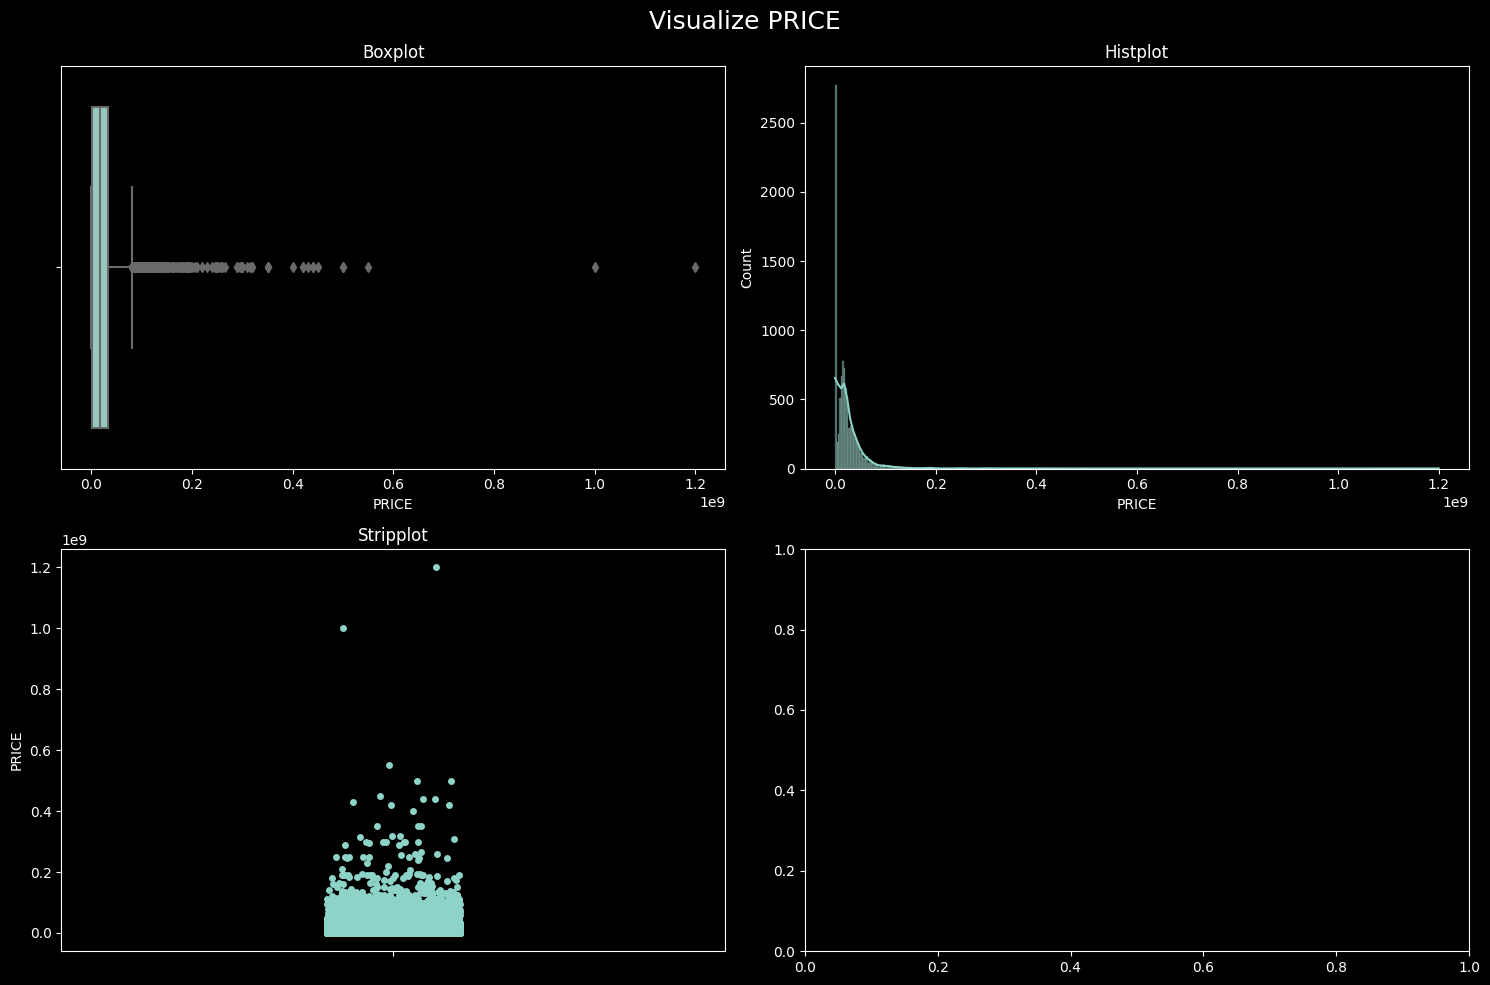

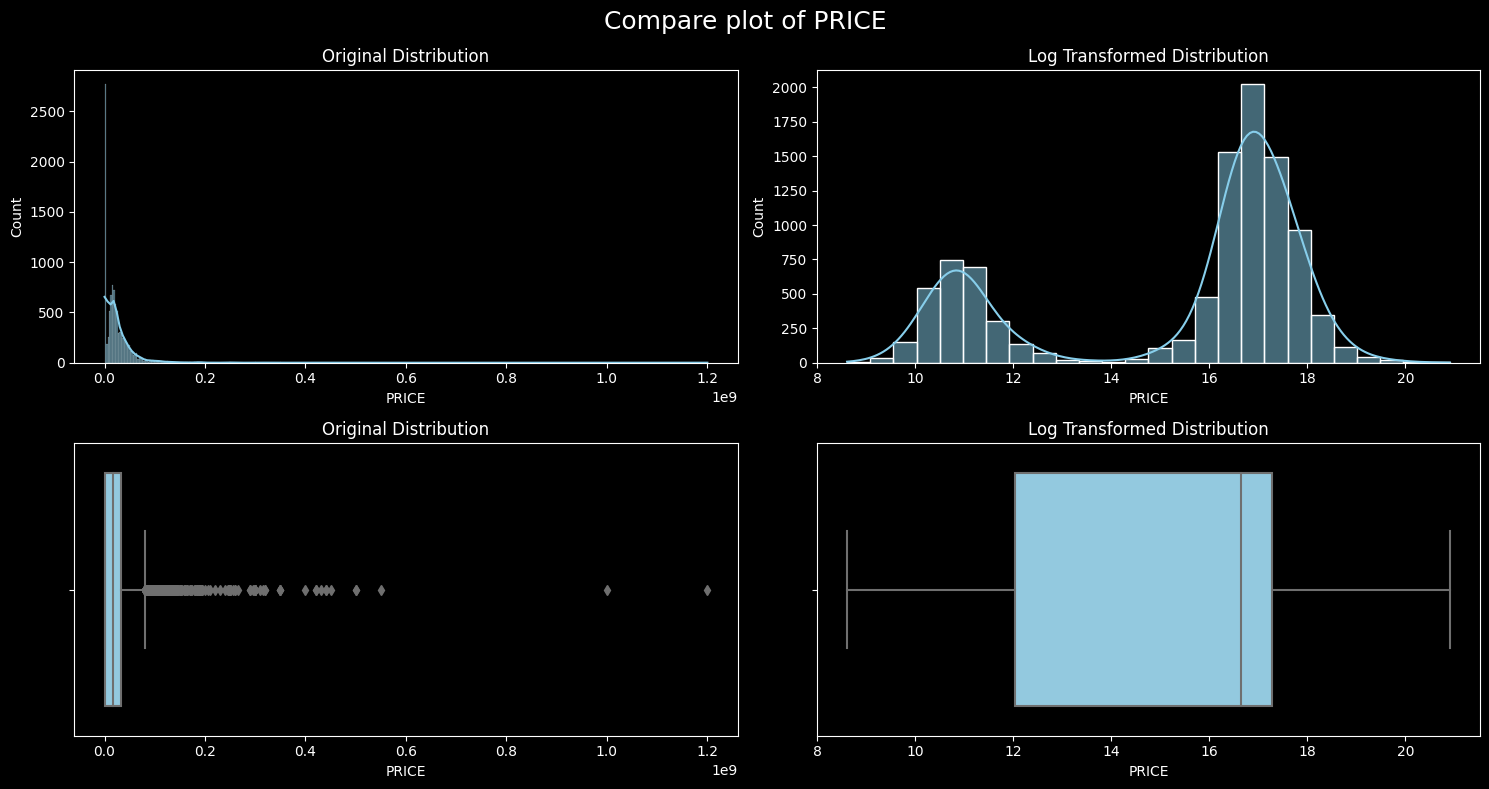

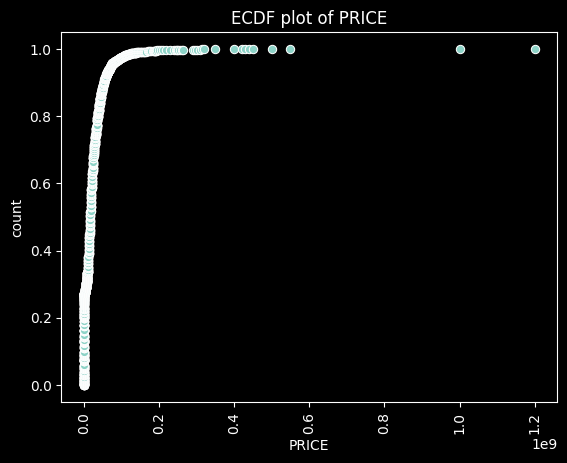

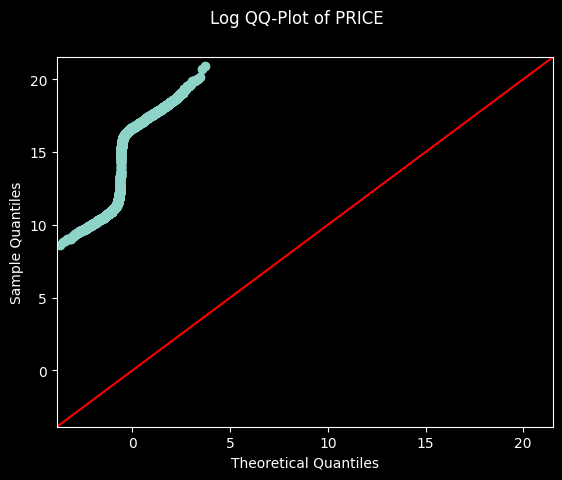

In [11]:
univariate.univariate_eda(df["PRICE"], compare=True, ecdf=True, qqplot_kw={"dist": "log"})

### Low Price DataFrame

In [12]:
# PRICE < 2 Lacs
low_price_df = df.query("PRICE<20_000")
print(low_price_df.shape)
low_price_df.sample(5)

(121, 33)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
6604,70882446,o70882446,gurgaon,15100.0,24.0,605.0,10.0,2 bhk flat in sector 102 gurgaon,"situated in sector 102 gurgaon gurgaon, suncit...",residential apartment,Semifurnished,East,1-5 Year Old Property,<15,2.0,suncity avenue 102,1.0,<15,28.472115,76.966707,2.0,sector 102 gurgaon,suncity avenue 102,suncity avenue 102,NaN,2.0,0.0,2.0,3.0,2.0,1.0,101,47
7213,70910358,e70910358,gurgaon,16000.0,25.0,632.0,10.0,2 bhk flat in sector 102 gurgaon,suncity avenue 102 is one of gurgaon's most so...,residential apartment,Semifurnished,North-East,1-5 Year Old Property,<15,2.0,suncity avenue 102,1.0,<15,28.474697,76.968627,2.0,sector 102 gurgaon,suncity avenue 102,suncity avenue 102,NaN,2.0,0.0,2.0,3.0,2.0,1.0,42,15
4613,70523906,v70523906,gurgaon,15000.0,28.0,626.0,15.0,2 bhk flat in sector 90 gurgaon,a spacious 2 bhk flat for rent is available in...,residential apartment,Semifurnished,North-East,0-1 Year Old Property,<15,2.0,green court,1.0,<15,28.404822,76.929875,2.0,sector 90 gurgaon,green court,green court,502,0.0,2.0,2.0,4.0,3.0,4.0,48,15
1704,70402474,f70402474,gurgaon,12000.0,23.0,519.0,10.0,2 bhk flat in sector 37d gurgaon,"situated in sector 37d gurgaon gurgaon, signat...",residential apartment,Unfurnished,East,0-1 Year Old Property,<15,2.0,signature global the millennia,3.0,<15,28.446875,76.983994,2.0,sector 37d gurgaon,signature global the millennia,signature global the millennia,NaN,3.0,2.0,2.0,1.0,1.0,1.0,49,15
1541,70666054,s70666054,gurgaon,15000.0,14.0,1000.0,46.0,3 bhk independent builder floor in ashok vihar...,carefully laid out in the prime location of gu...,independent/builder floor,Semifurnished,North-East,1-5 Year Old Property,<15,3.0,NaN,1.0,<15,28.459896,77.098816,3.0,ashok vihar phase 2,NaN,NaN,"2690/30,near shiv shakti mandir opposite new s...",3.0,5.0,0.0,2.0,10.0,3.0,0,0


In [13]:
low_price_df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        96
independent/builder floor    21
independent house/villa       4
Name: count, dtype: int64

In [14]:
low_price_df["LOCALITY_NAME"].value_counts()

LOCALITY_NAME
sector 37d gurgaon             14
sector 95 gurgaon              12
sector 86 gurgaon              11
sohna                           9
sector 82 gurgaon               7
sector 102 gurgaon              7
sector 95a gurgaon              6
sector 90 gurgaon               6
sector 83 gurgaon               6
sector 56 gurgaon               5
sector 70a gurgaon              4
sector 107 gurgaon              3
sector 37c gurgaon              2
sector 81 gurgaon               2
sector 103 gurgaon              2
sector 99 gurgaon               2
sector 92 gurgaon               2
sector 67 gurgaon               2
sector 23a gurgaon              2
sector 2 gurgaon                2
dwarka expressway gurgaon       1
sector 88a gurgaon              1
sector 67a gurgaon              1
malibu town                     1
sector-33 sohna                 1
ashok vihar phase 2             1
sector 22 gurgaon               1
c block sushant lok phase 1     1
sector 23 gurgaon               1


In [15]:
summary.custom_describe(low_price_df["PRICE"])

,PRICE
count,121.000000
mean,15063.619835
std,3096.686746
min,5500.000000
1%,7100.000000
5%,8500.000000
25%,13500.000000
50%,15000.000000
75%,17500.000000
95%,19000.000000


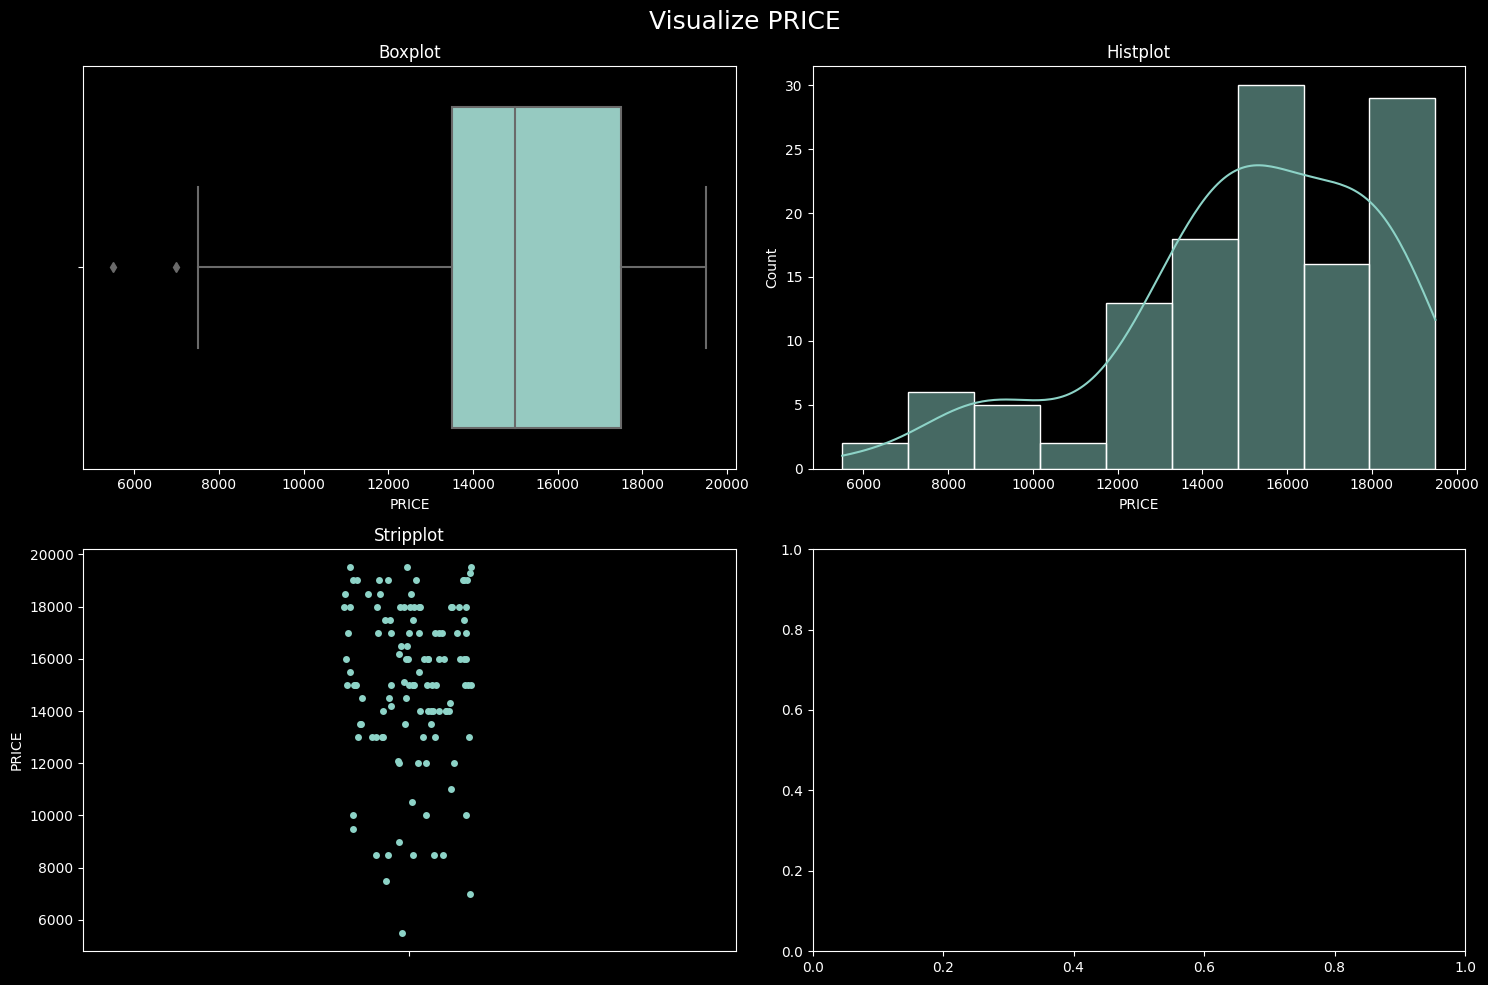

In [16]:
univariate.visualise_feature(low_price_df["PRICE"])

### High Price DataFrame

In [17]:
# PRICE > 96%tile
high_price_df = df.query(f"PRICE>{df['PRICE'].quantile(0.96)}")
print(high_price_df.shape)
high_price_df.sample(5)

(396, 33)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
8929,70047684,z70047684,gurgaon,82500000.0,110000.0,6750.0,10.0,residential land / plot in sector 99 gurgaon,"g99 in sector-99 gurgaon, gurgaon by the uppal...",residential land,not available,North-East,Undefined,<15,NaN,g99,NaN,>30,28.463121,76.962544,NaN,sector 99 gurgaon,g99,g99,NaN,1.0,1.0,2.0,2.0,1.0,3.0,24,0
9033,70364170,l70364170,gurgaon,97500000.0,25090.0,3886.0,9.0,4 bhk flat in sector 54 gurgaon,it's excellent location gives you the boon of ...,residential apartment,Semifurnished,not available,10+ Year Old Property,15-30,4.0,emaar the palm springs,4.0,<15,28.446850,77.102071,4.0,sector 54 gurgaon,emaar the palm springs,emaar the palm springs,NaN,2.0,0.0,2.0,3.0,0.0,2.0,72,53
33,70991572,o70991572,gurgaon,84500000.0,281666.0,2700.0,3.0,5 bedroom house in dlf phase 2,north east facing well renovated villa best bl...,independent house/villa,Semifurnished,North-East,1-5 Year Old Property,<15,5.0,dlf city plots phase 2,4.0,>30,28.489563,77.087681,5.0,dlf phase 2,dlf city plots phase 2,dlf city plots phase 2,north east facing,0.0,0.0,1.0,1.0,1.0,0.0,107,55
5218,70089736,e70089736,gurgaon,108000000.0,300000.0,3240.0,47.0,12 bedroom house in dlf phase 4,360 yards beautiful house for sale in dlf phas...,independent house/villa,Semifurnished,North,1-5 Year Old Property,<15,12.0,NaN,4.0,>30,28.465786,77.083806,12.0,dlf phase 4,NaN,NaN,NaN,3.0,3.0,0.0,2.0,13.0,2.0,51,12
6536,68942562,k68942562,gurgaon,104900000.0,26225.0,4000.0,8.0,5 bhk independent builder floor in dlf phase 5,dlf grove is independent floor developing by d...,independent/builder floor,Semifurnished,East,Under Construction,<15,5.0,dlf the grove,3.0,<15,28.440290,77.109390,5.0,dlf phase 5,dlf the grove,dlf the grove,204,2.0,0.0,1.0,2.0,1.0,2.0,114,55


In [18]:
high_price_df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential land             133
independent house/villa      126
residential apartment        119
independent/builder floor     18
Name: count, dtype: int64

In [19]:
high_price_df["LOCALITY_NAME"].value_counts()

LOCALITY_NAME
dlf phase 1            37
sector 54 gurgaon      35
sector 42 gurgaon      30
dlf phase 2            22
sector 65 gurgaon      22
                       ..
v block dlf phase 3     1
gwal pahari             1
ansal palam vihar       1
sector 106 gurgaon      1
sector 83 gurgaon       1
Name: count, Length: 72, dtype: int64

In [20]:
summary.custom_describe(high_price_df["PRICE"])

,PRICE
count,3.960000e+02
mean,1.424747e+08
std,1.016342e+08
min,8.050000e+07
1%,8.128500e+07
5%,8.280000e+07
25%,9.500000e+07
50%,1.100000e+08
75%,1.450000e+08
95%,3.000000e+08


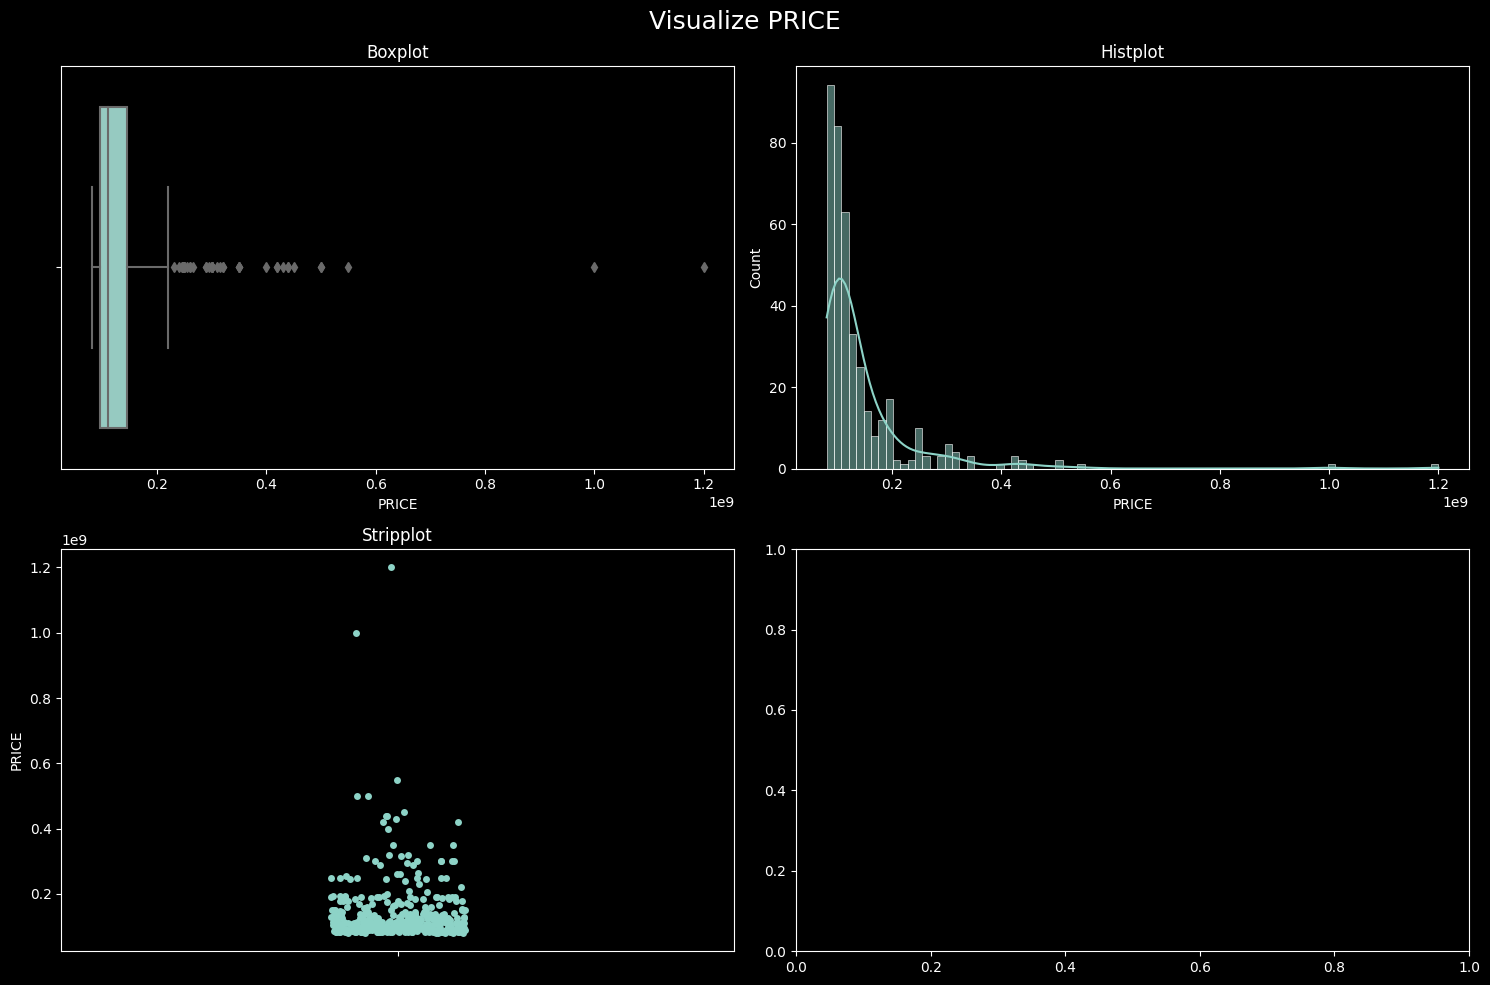

In [21]:
univariate.visualise_feature(high_price_df["PRICE"])

#### For now, all the feature seems right to me except the `PRICE, PRICE_SQFT, AREA` are odd.

- I can't ignore/drop them because they are **about 3000+ data**.
- I need to go to the website using its the property URL and investigate what's happening.

**This same senario goes for `PRICE_SQFT` and `AREA` features. That's why I am not going to analyse them like this.**

- I am going to drop these for now to perform better EDA.

## AREA

In [22]:
summary.custom_describe(df["AREA"])

,AREA
count,10032.000000
mean,2829.715461
std,14399.361193
min,30.000000
1%,360.000000
5%,900.000000
25%,1593.000000
50%,2072.000000
75%,2700.000000
95%,4518.000000


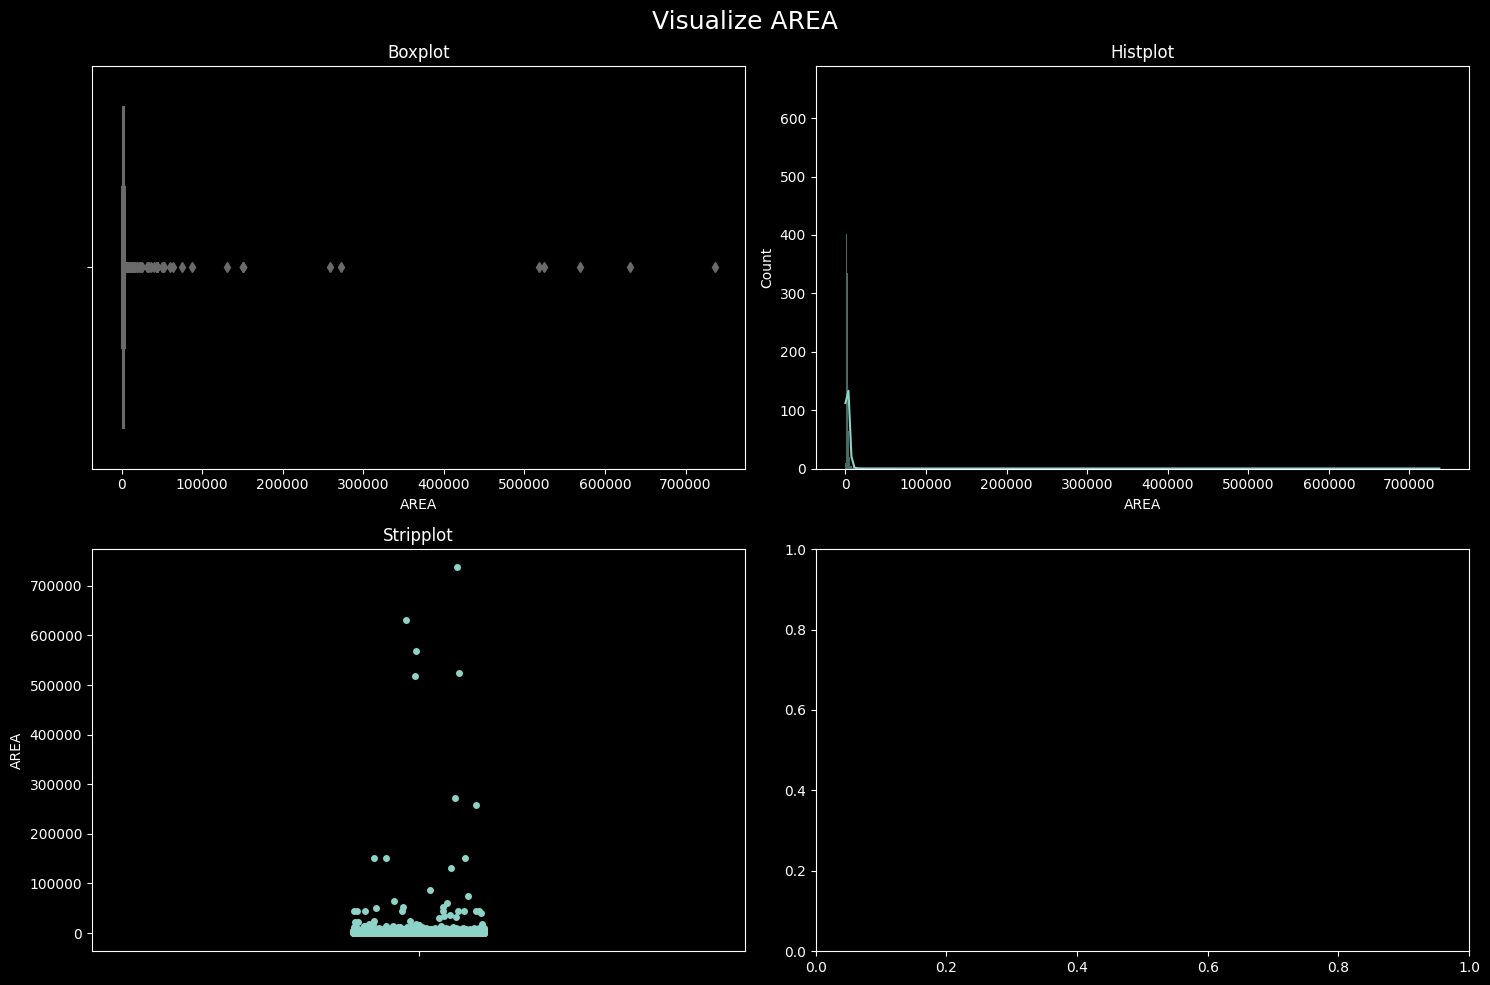

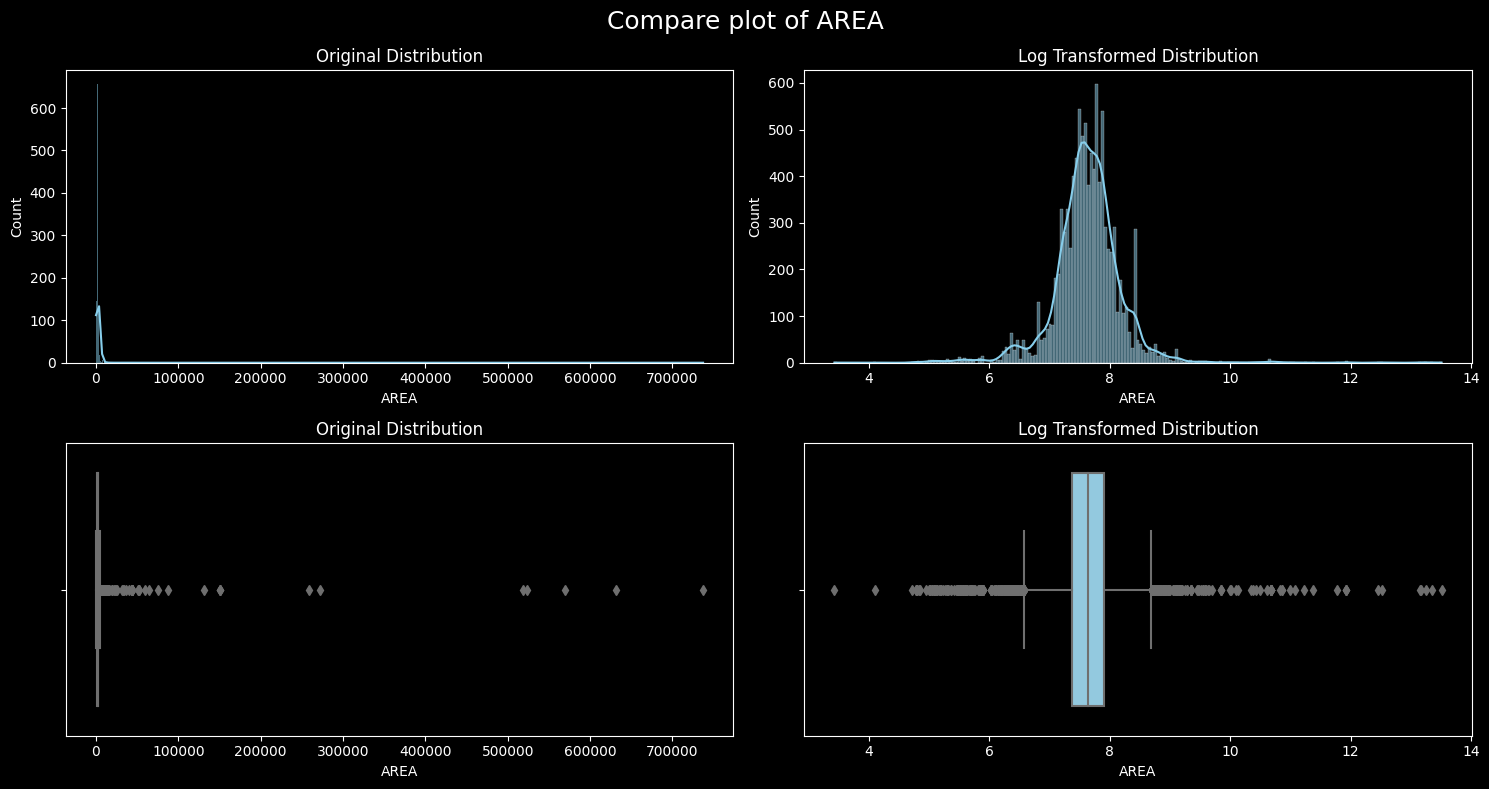

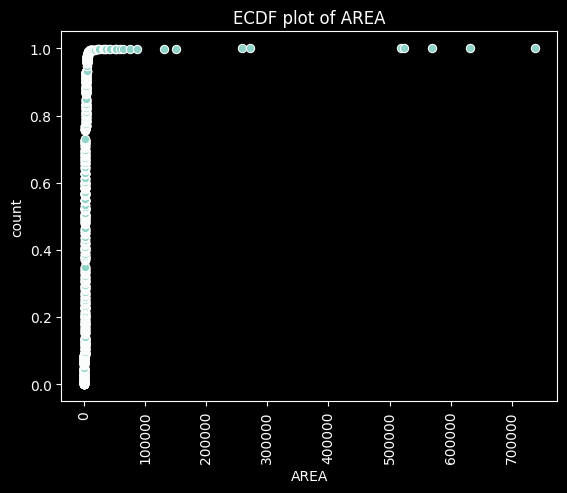

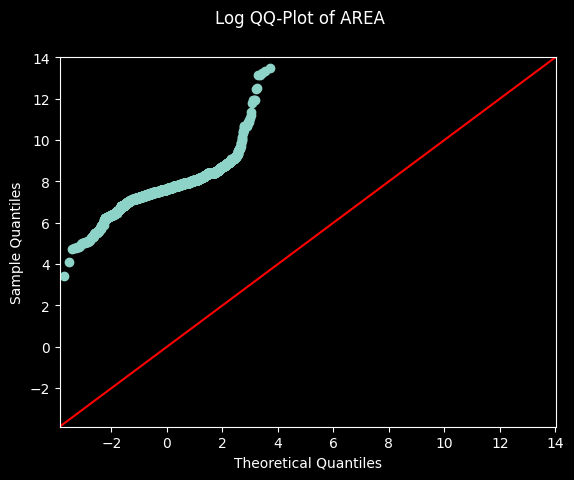

In [23]:
univariate.univariate_eda(df["AREA"], compare=True, ecdf=True, qqplot_kw={"dist": "log"})

### High Area DataFrame

In [24]:
# PRICE > 95%tile
high_area_df = df.query(f"AREA>{df['AREA'].quantile(0.95)}")
high_area_df.shape

(446, 33)

In [25]:
summary.custom_describe(high_area_df["AREA"])

,AREA
count,446.000000
mean,17712.141256
std,66524.264090
min,4520.000000
1%,4548.000000
5%,4600.000000
25%,4992.000000
50%,6000.000000
75%,7900.000000
95%,43560.000000


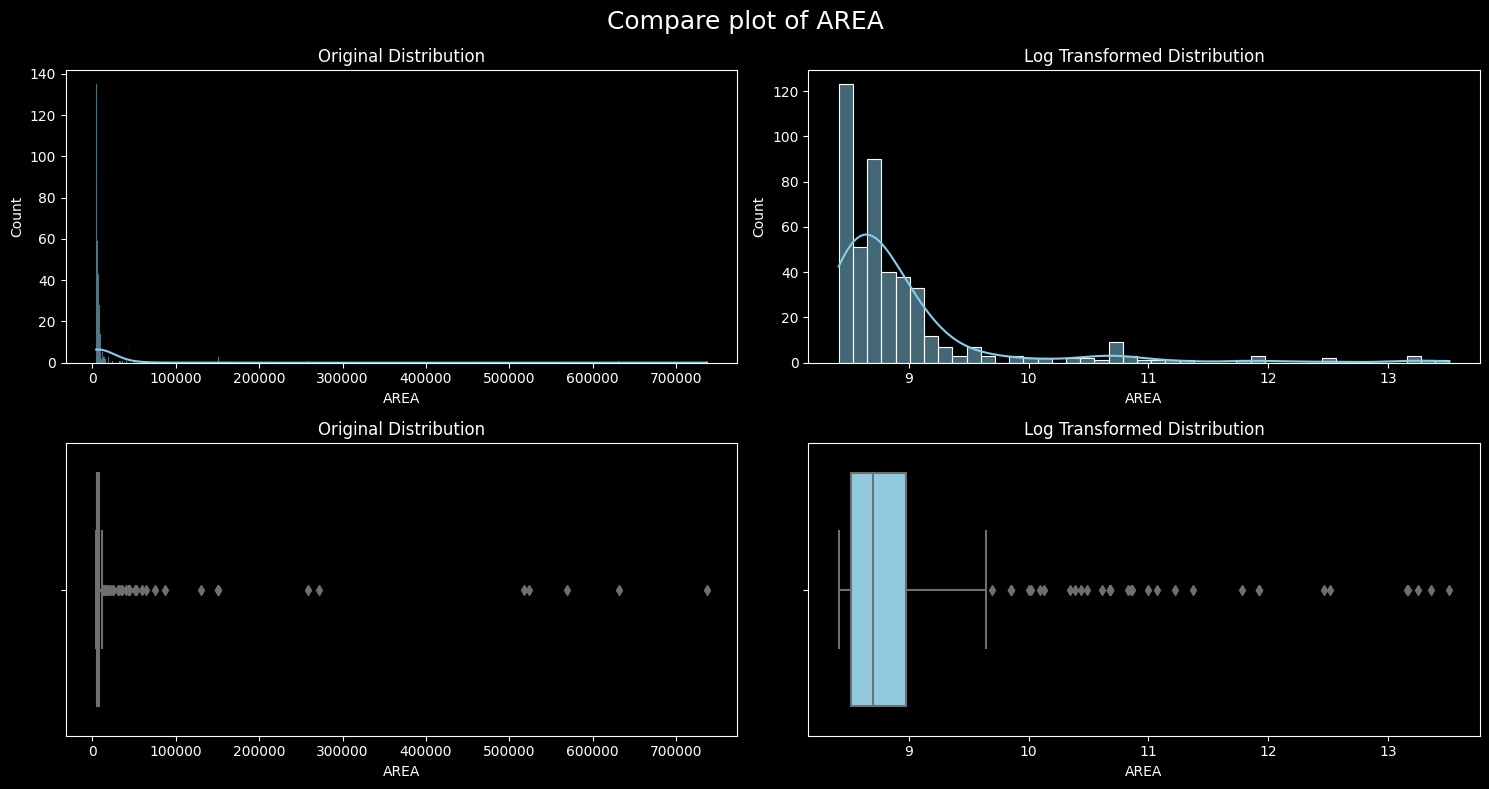

In [26]:
univariate.compare_plot(high_area_df["AREA"])

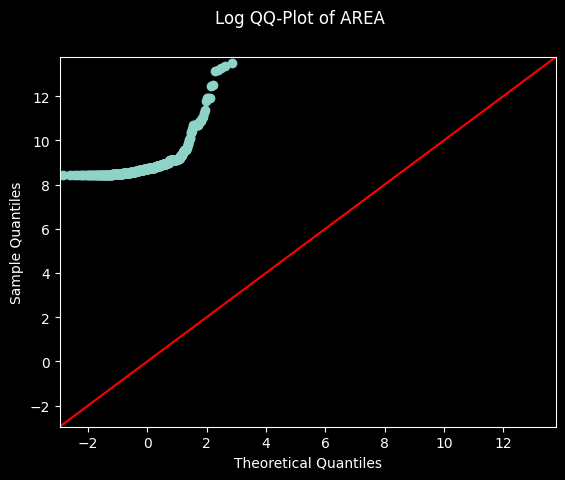

In [27]:
univariate.qqplot(high_area_df["AREA"], "log")

## filtered_df

`filtered_df` repersents the perfect dataset for the model because it has no outliers for `PRICE` and `AREA` features.

In [28]:
filtered_df = df.copy(True)
filtered_df.shape

(10032, 33)

In [29]:
filtered_df.drop(index=low_price_df.index, inplace=True, errors="ignore")
filtered_df.drop(index=high_price_df.index, inplace=True, errors="ignore")
filtered_df.drop(index=high_area_df.index, inplace=True, errors="ignore")
filtered_df.shape

(9232, 33)

In [30]:
summary.custom_describe(df[["PRICE", "AREA"]])

,PRICE,AREA
count,1.003200e+04,10032.000000
mean,2.414677e+07,2829.715461
std,3.615741e+07,14399.361193
min,5.500000e+03,30.000000
1%,1.800000e+04,360.000000
5%,3.200000e+04,900.000000
25%,1.700000e+05,1593.000000
50%,1.700000e+07,2072.000000
75%,3.210000e+07,2700.000000
95%,7.200000e+07,4518.000000


### PRICE

In [31]:
summary.compare_describe(df["PRICE"], filtered_df["PRICE"], reciprocal_ratio=True)

,PRICE as data1,PRICE as data2,data1 - data2,data1 ÷ data2,data2 ÷ data1
count,1.003200e+04,9.232000e+03,8.000000e+02,1.086655,0.920255
mean,2.414677e+07,1.913926e+07,5.007507e+06,1.261635,0.792622
std,3.615741e+07,1.785140e+07,1.830601e+07,2.025466,0.493714
min,5.500000e+03,2.000000e+04,-1.450000e+04,0.275000,3.636364
1%,1.800000e+04,2.350000e+04,-5.500000e+03,0.765957,1.305556
5%,3.200000e+04,3.400000e+04,-2.000000e+03,0.941176,1.062500
25%,1.700000e+05,1.500000e+05,2.000000e+04,1.133333,0.882353
50%,1.700000e+07,1.650000e+07,5.000000e+05,1.030303,0.970588
75%,3.210000e+07,2.850000e+07,3.600000e+06,1.126316,0.887850
95%,7.200000e+07,5.500000e+07,1.700000e+07,1.309091,0.763889


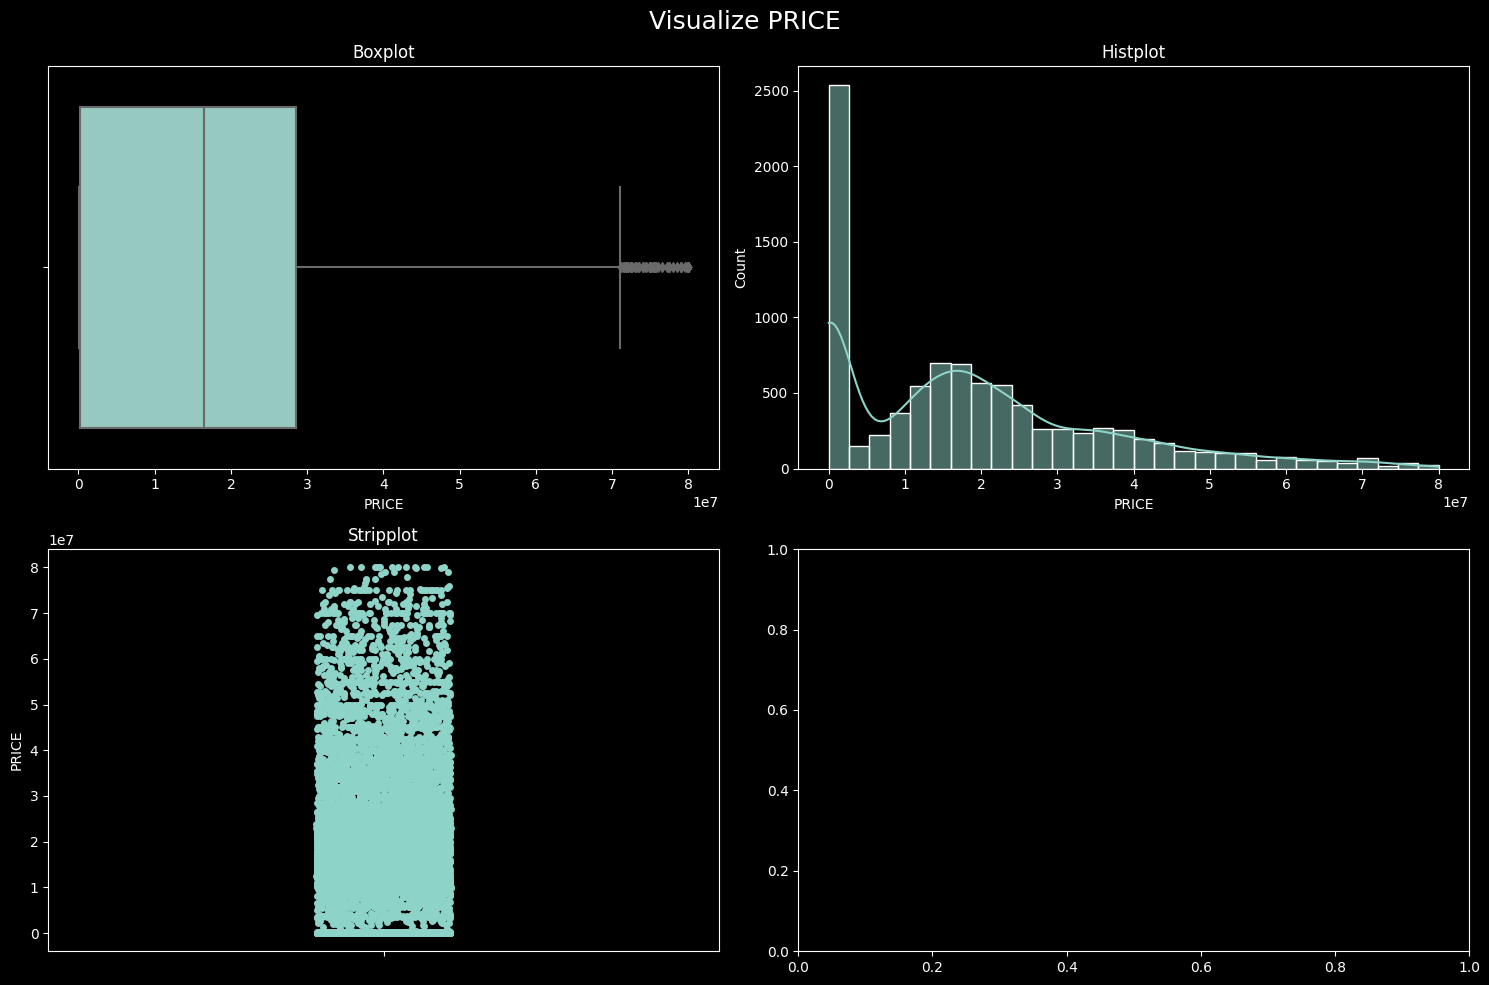

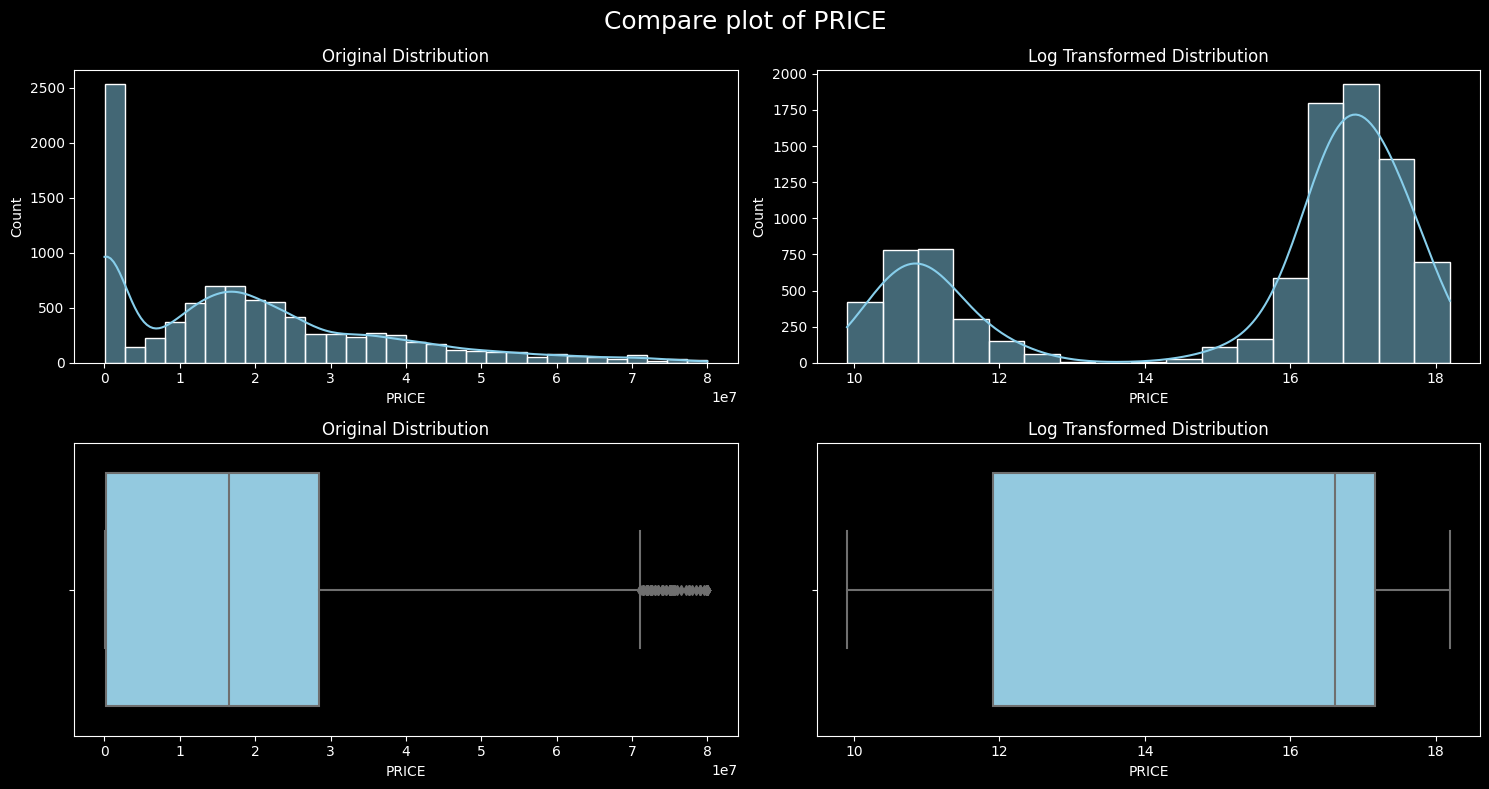

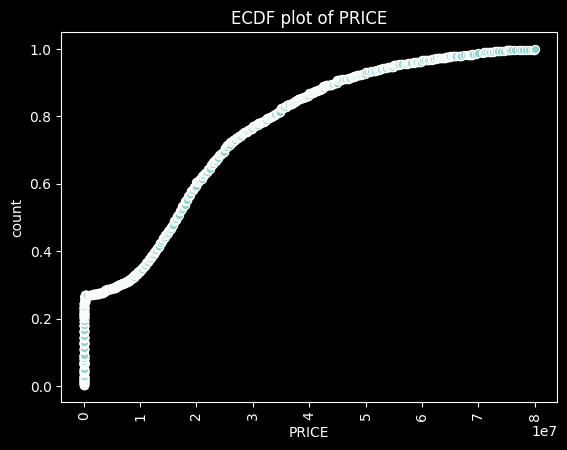

In [32]:
univariate.univariate_eda(filtered_df["PRICE"], compare=True, ecdf=True)

### AREA

In [33]:
summary.compare_describe(df["AREA"], filtered_df["AREA"], reciprocal_ratio=True)

,AREA as data1,AREA as data2,data1 - data2,data1 ÷ data2,data2 ÷ data1
count,10032.000000,9232.000000,800.000000,1.086655,0.920255
mean,2829.715461,2119.352632,710.362828,1.335179,0.748963
std,14399.361193,822.352124,13577.009069,17.509970,0.057110
min,30.000000,30.000000,0.000000,1.000000,1.000000
1%,360.000000,357.240000,2.760000,1.007726,0.992333
5%,900.000000,900.000000,0.000000,1.000000,1.000000
25%,1593.000000,1572.000000,21.000000,1.013359,0.986817
50%,2072.000000,2000.000000,72.000000,1.036000,0.965251
75%,2700.000000,2592.000000,108.000000,1.041667,0.960000
95%,4518.000000,3670.900000,847.100000,1.230761,0.812506


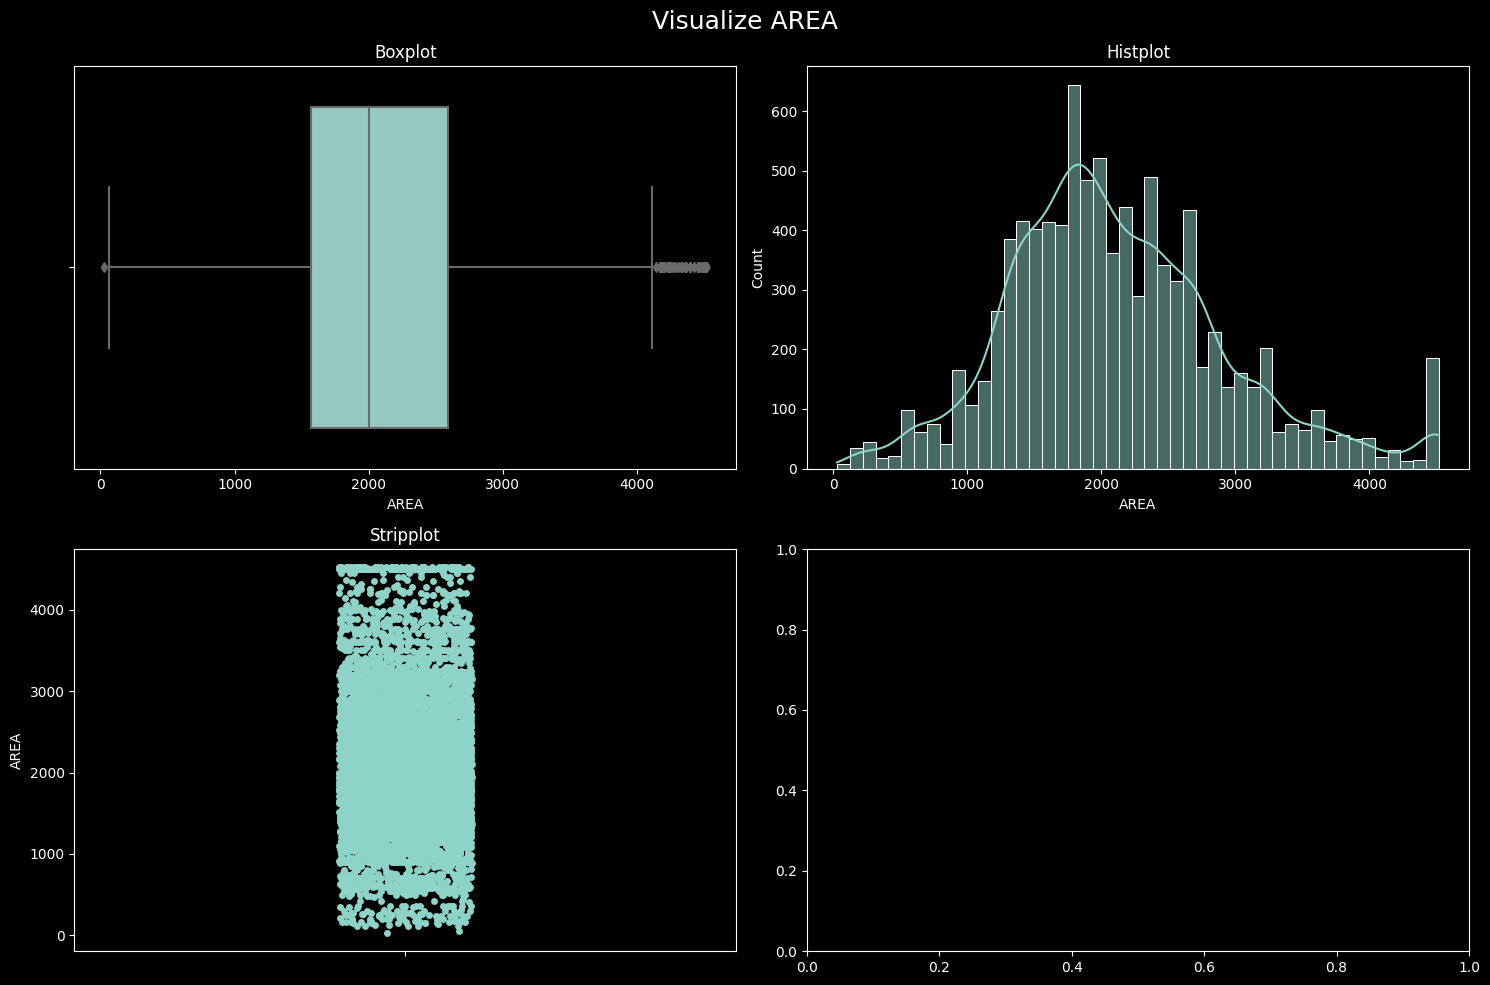

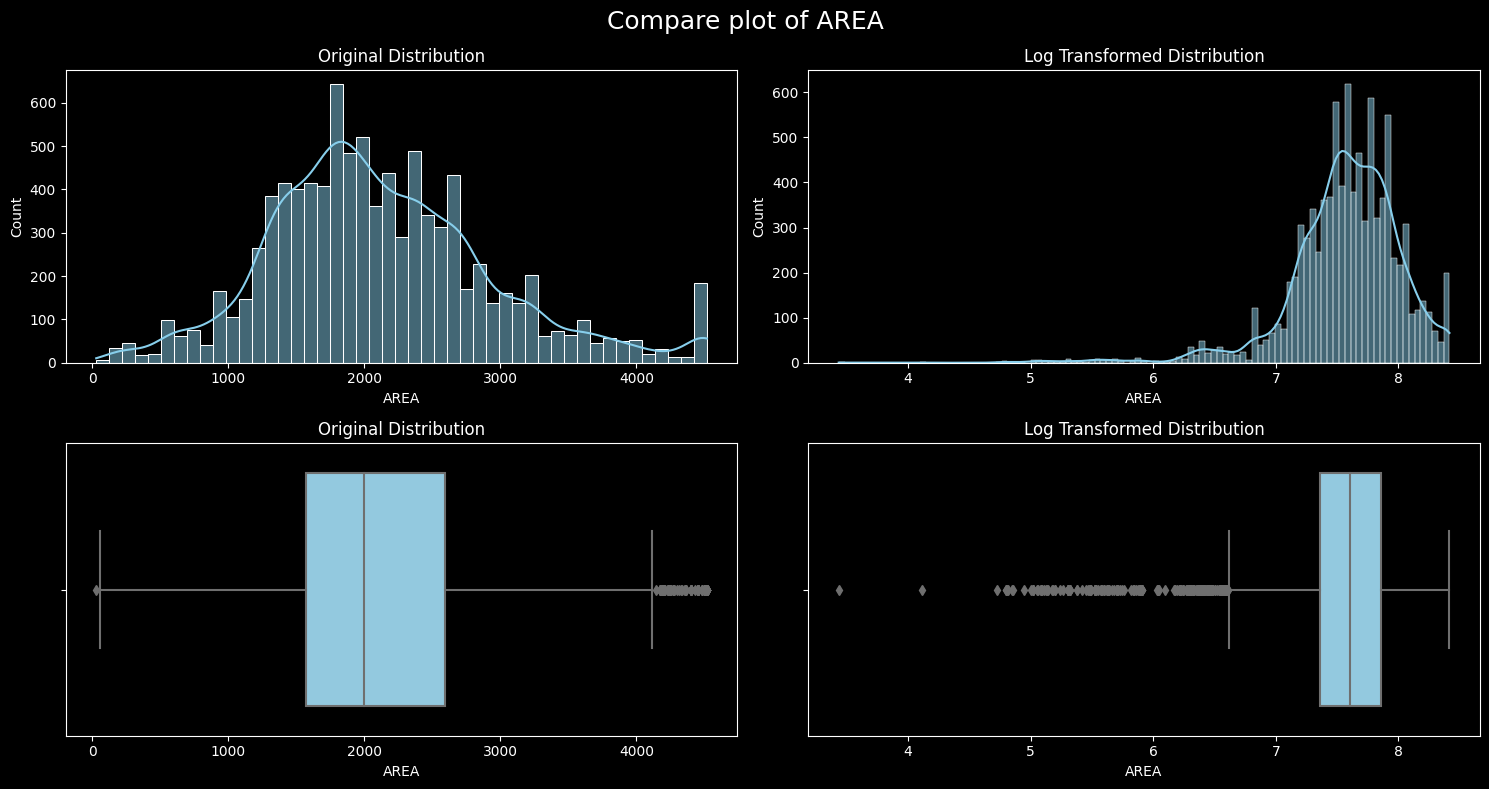

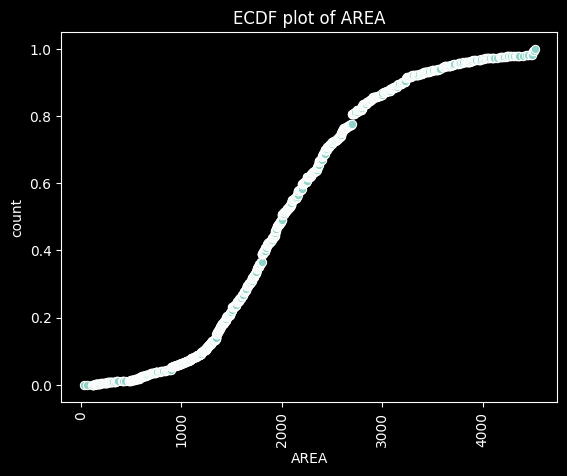

In [34]:
univariate.univariate_eda(filtered_df["AREA"], compare=True, ecdf=True)


---

---


## TOTAL_LANDMARK_COUNT

In [35]:
summary.custom_describe(df["TOTAL_LANDMARK_COUNT"])

,TOTAL_LANDMARK_COUNT
count,9971.000000
mean,21.860696
std,16.447910
min,1.000000
1%,3.000000
5%,6.000000
25%,10.000000
50%,13.000000
75%,45.000000
95%,48.000000


<Axes: xlabel='TOTAL_LANDMARK_COUNT', ylabel='Count'>

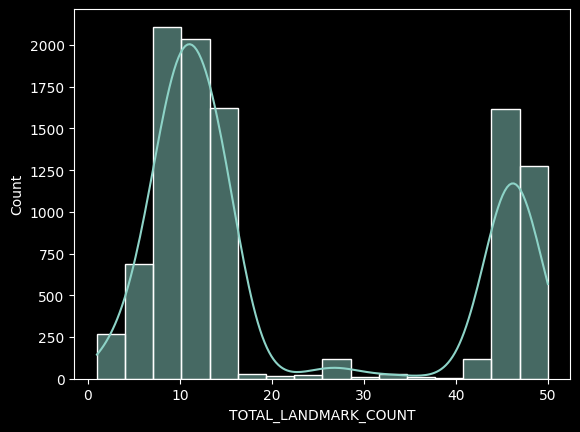

In [36]:
sns.histplot(df["TOTAL_LANDMARK_COUNT"], kde=True)

<Axes: >

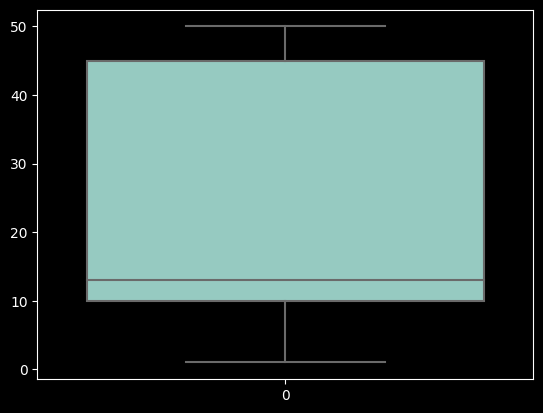

In [37]:
sns.boxplot(df["TOTAL_LANDMARK_COUNT"])

## PROPERTY_HEADING

In [38]:
df["PROP_HEADING"].sample(10)

2748     4 bhk independent builder floor in sector 65 g...
1771                       3 bhk flat in sector 83 gurgaon
7558                      3 bhk flat in sector 102 gurgaon
8745                      2 bhk flat in sector 106 gurgaon
10061                      3 bhk flat in sector 56 gurgaon
7027                        2 bhk flat in sector 3 gurgaon
9136                     4 bhk flat in sushant lok phase 1
6496        3 bhk independent builder floor in malibu town
7088                       3 bhk flat in sector 77 gurgaon
3270                       3 bhk flat in sector 59 gurgaon
Name: PROP_HEADING, dtype: object

`PROP_HEADING` is just contains **bhk, property type and locality name** of the correspoing property.

## DESCRIPTION

In [39]:
df["DESCRIPTION"].sample(10)

9085    joyville 1368sqft 2 bhk - ready to move in  ne...
5053    this property is located in sector 70, it has ...
4320    check out this 3 bhk apartment for sale in par...
9915    gated society 3 bedroom with power backup, lif...
2135    sushant lok 1 . most prime location of gurugra...
54      this project ranks amongst the most popular pr...
4249    new luxury builder floor for sale  greenwood c...
2226    this 2 bhk flat is located in indiabulls centr...
4744    uppal southend s block sector 49 gurgaon  3bhk...
1780    5 bhk luxury builder floor available in malibu...
Name: DESCRIPTION, dtype: object

## PROPERTY_TYPE

In [40]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: count, dtype: int64

### Extract all different `PROPERTY_TYPE`

In [41]:
res_apartment = df.query("PROPERTY_TYPE=='residential apartment'")
ind_builder_floor = df.query("PROPERTY_TYPE=='independent/builder floor'")
res_land = df.query("PROPERTY_TYPE=='residential land'")
ind_house = df.query("PROPERTY_TYPE=='independent house/villa'")

#### PRICE

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                             Univariate Plots of Residendial Apartment                              
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


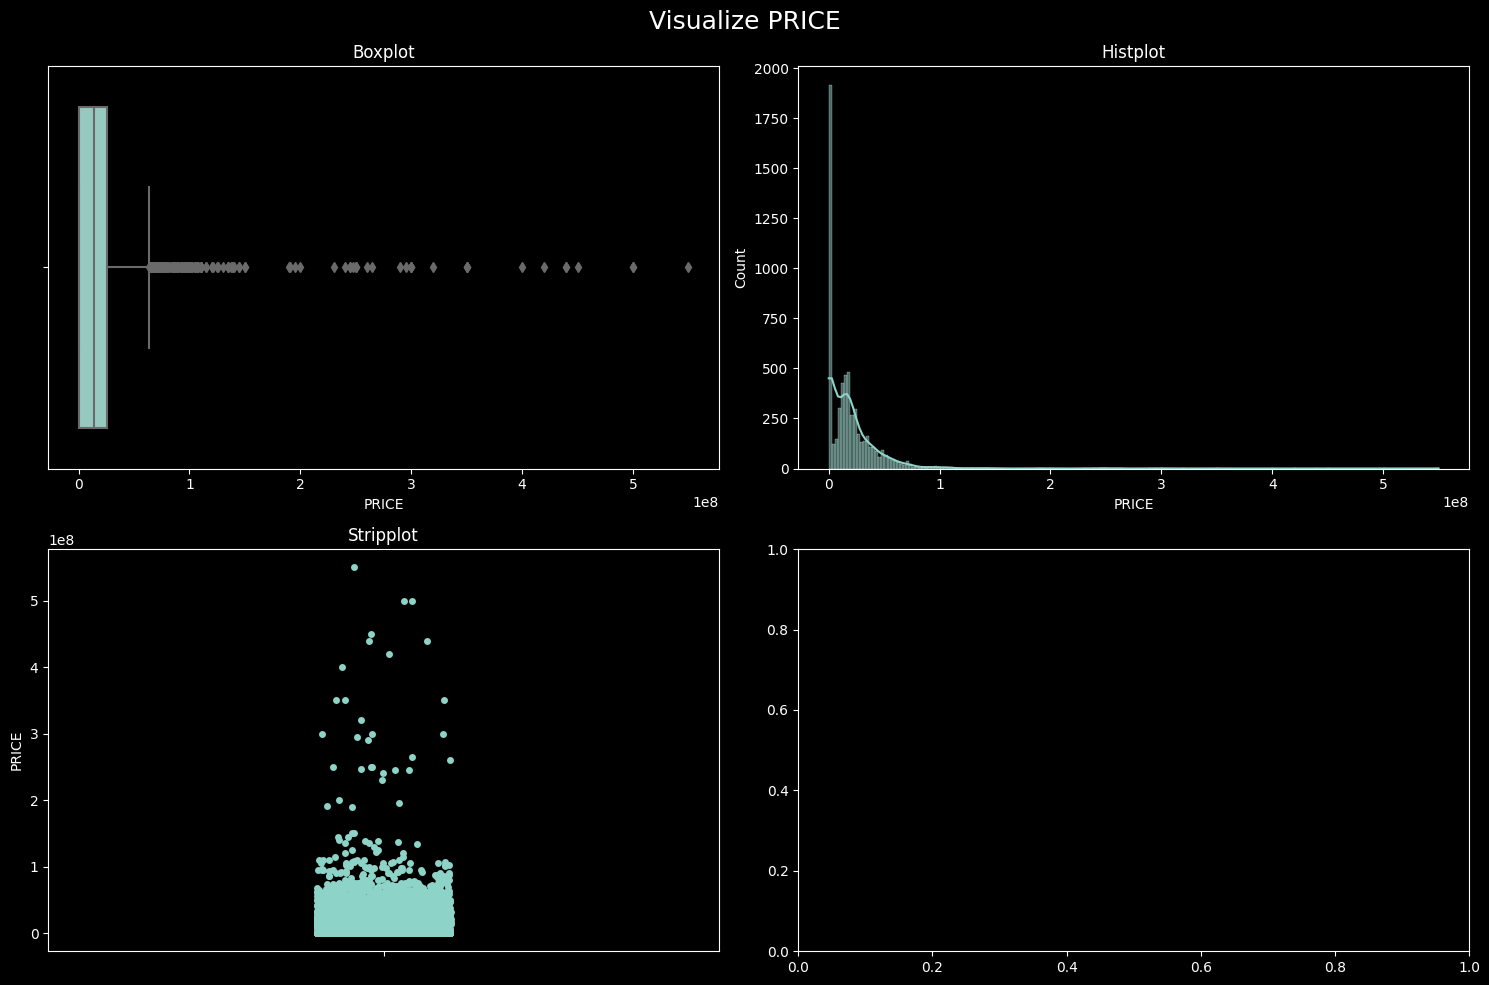

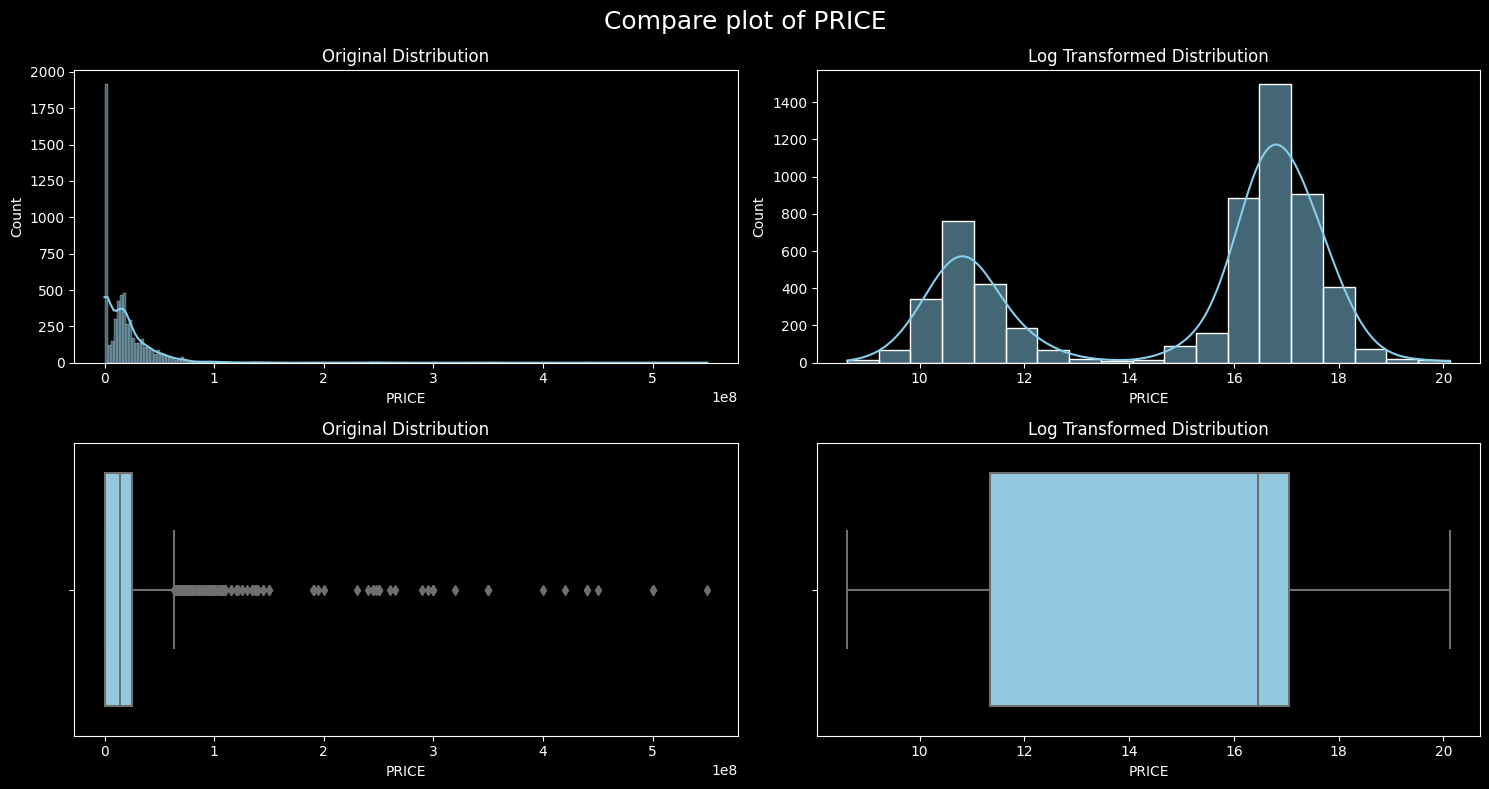

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                           Univariate Plots of Independent Builder Floor                            
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


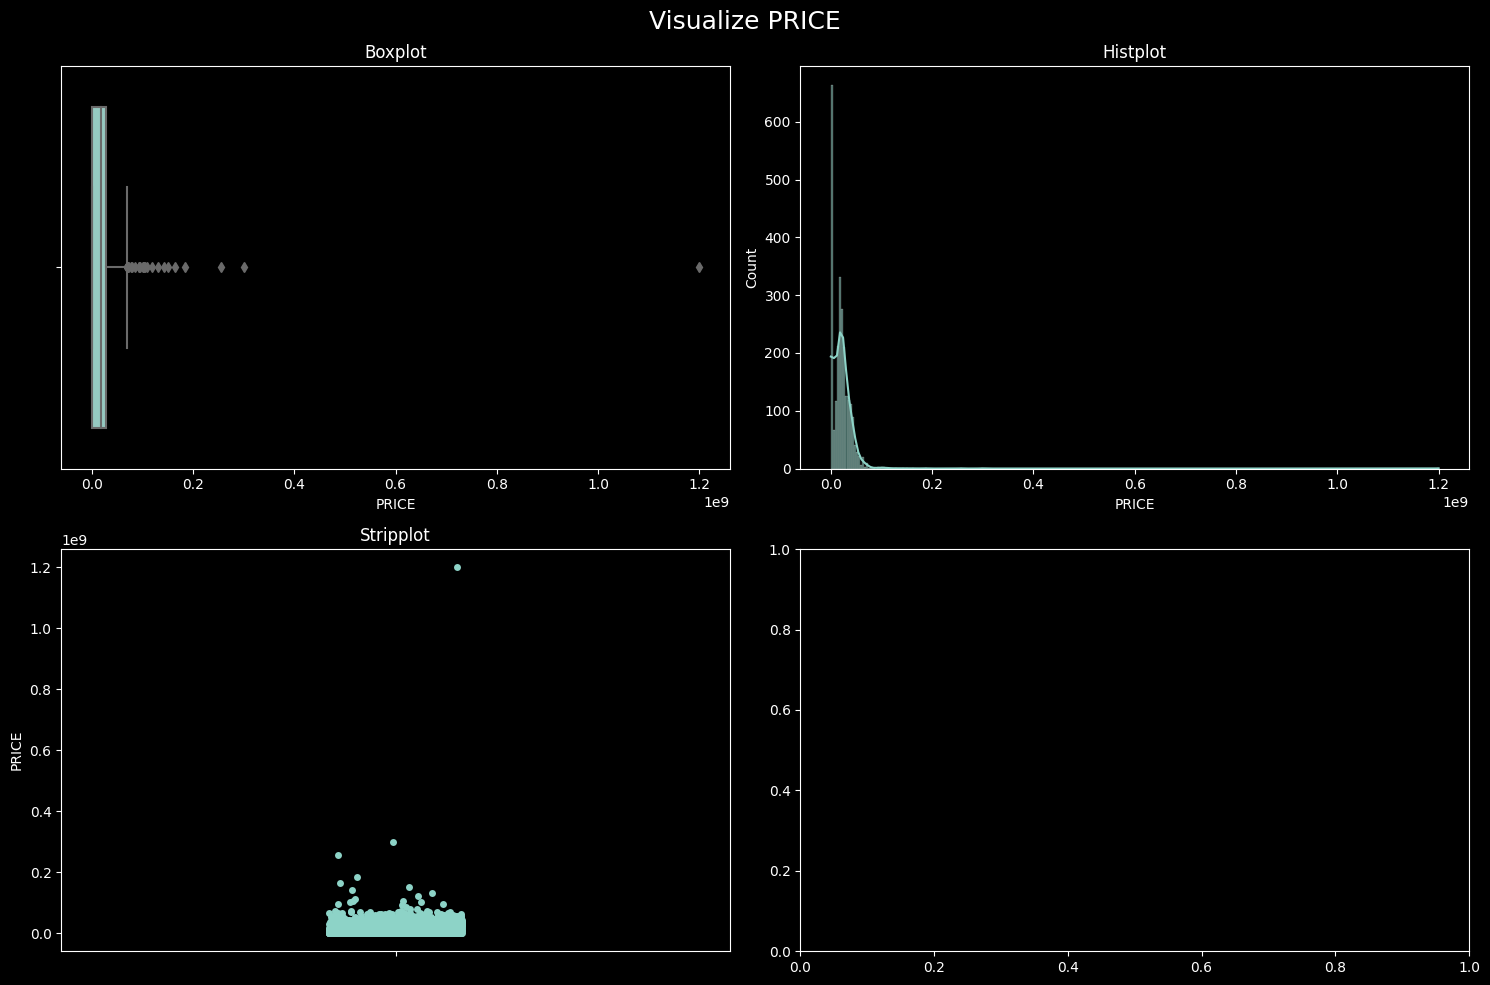

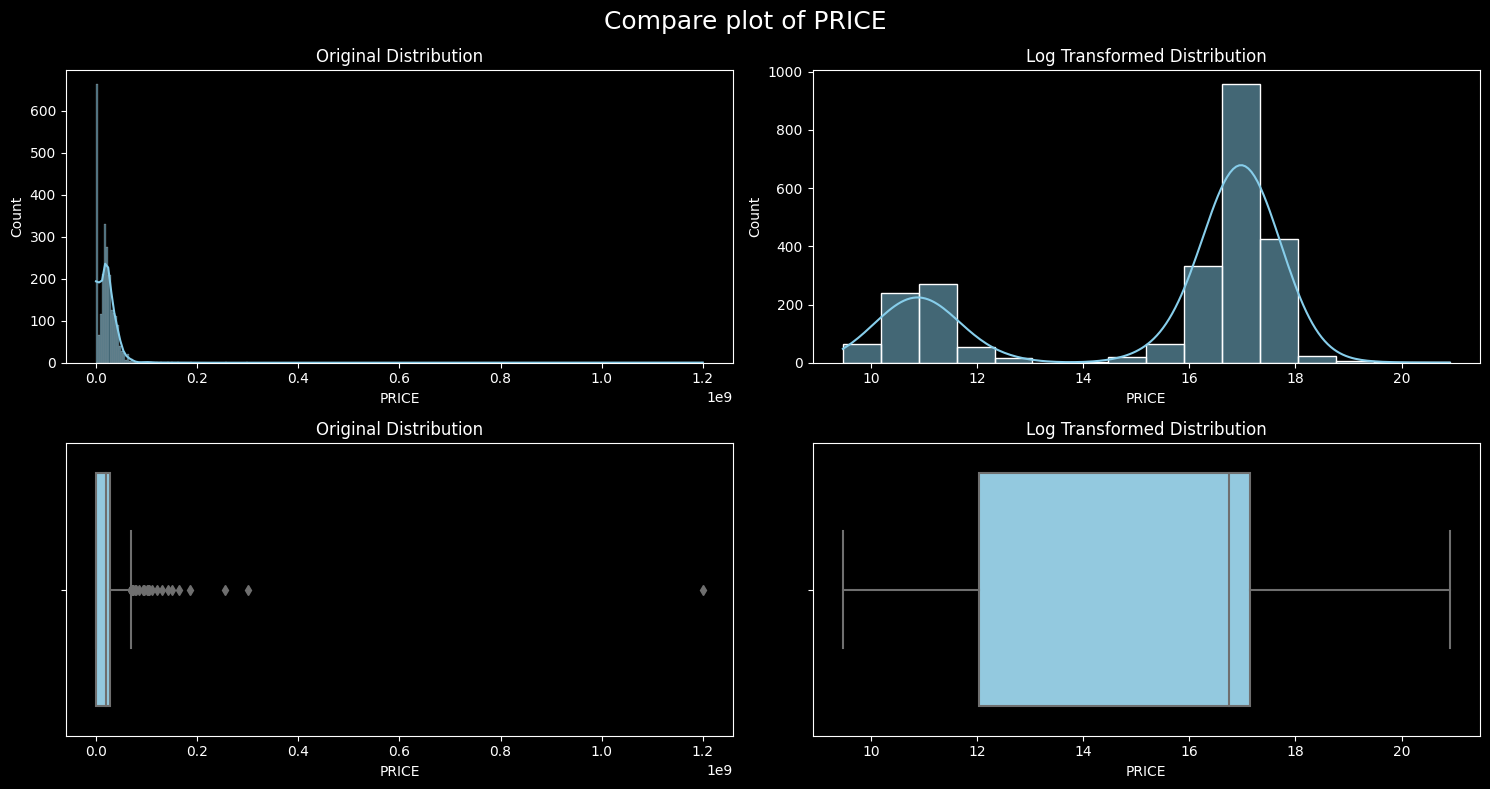

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                                Univariate Plots of Residendial Land                                
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


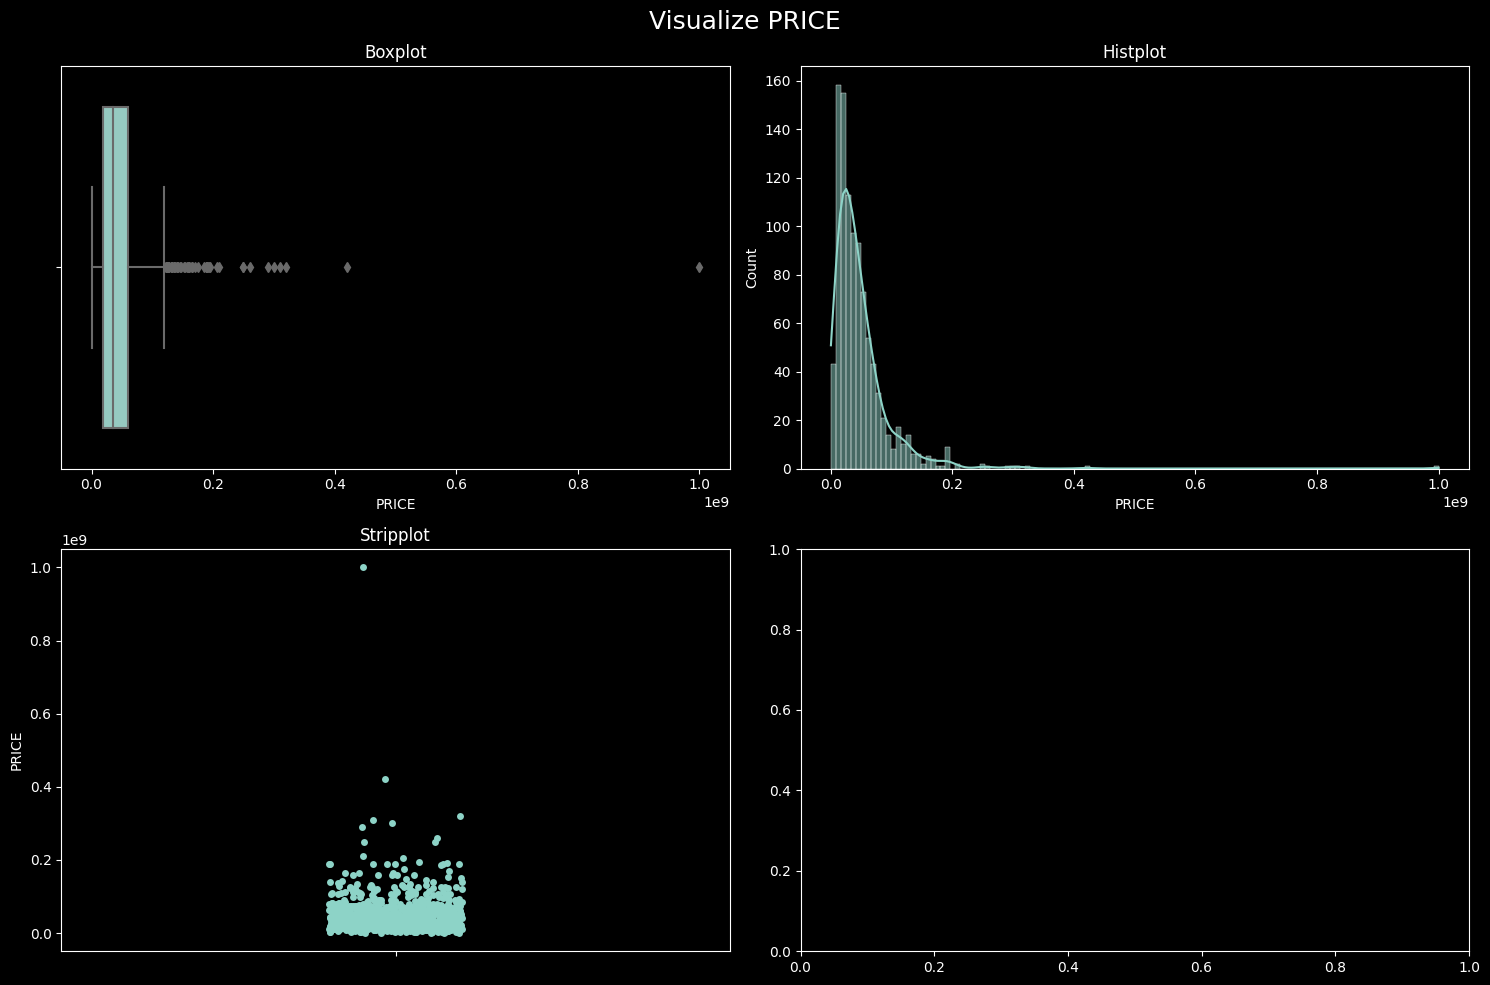

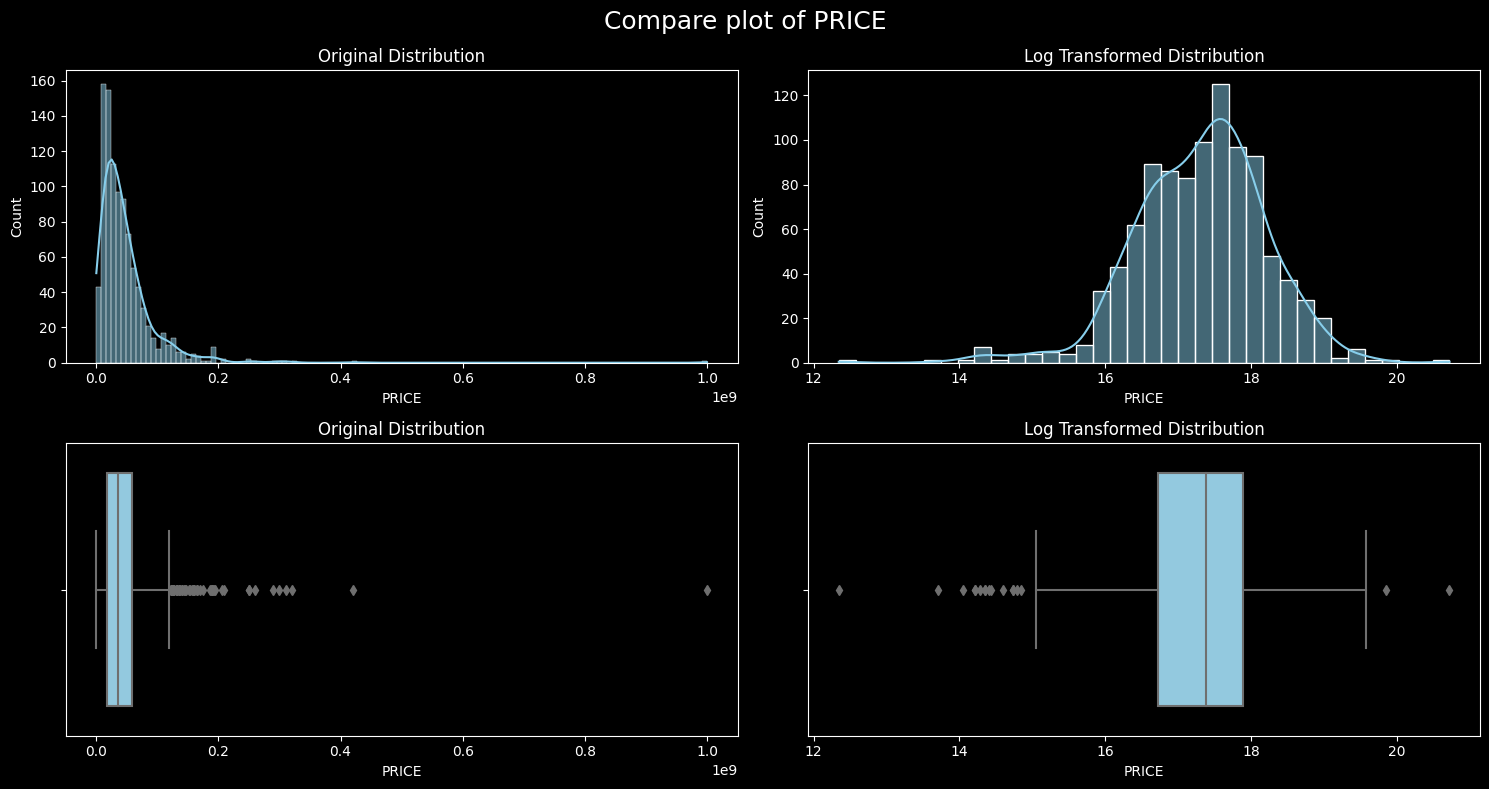

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                               Univariate Plots of Independent House                                
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


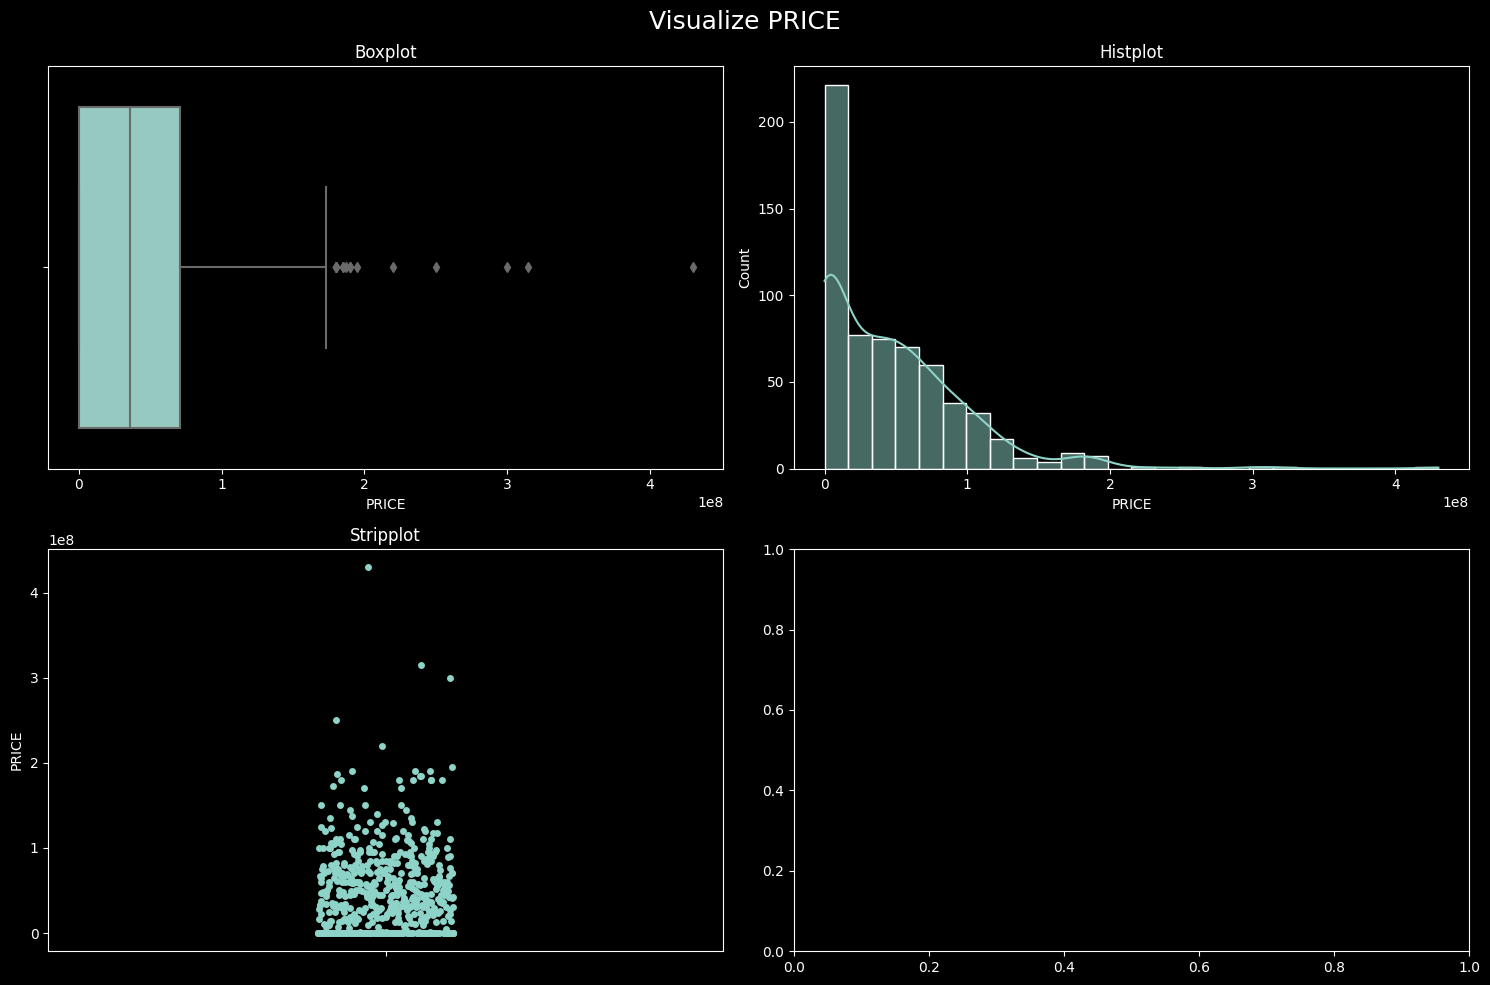

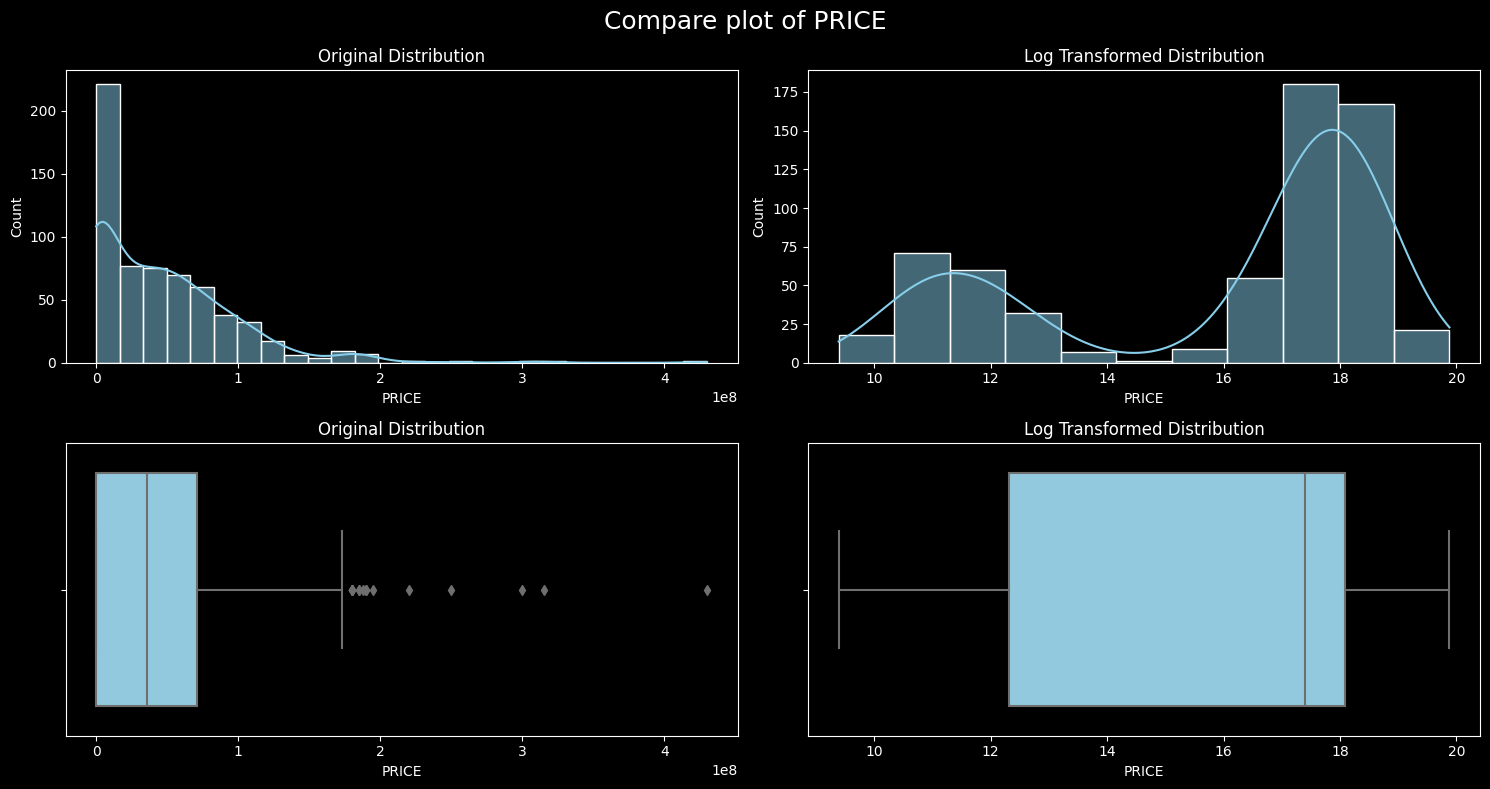

In [42]:
plot_type = "Univariate Plots of"

univariate.univariate_eda(
    res_apartment["PRICE"],
    f"{plot_type} Residendial Apartment",
    compare=True,
)
univariate.univariate_eda(
    ind_builder_floor["PRICE"],
    f"{plot_type} Independent Builder Floor",
    compare=True,
)
univariate.univariate_eda(
    res_land["PRICE"],
    f"{plot_type} Residendial Land",
    compare=True,
)
univariate.univariate_eda(
    ind_house["PRICE"],
    f"{plot_type} Independent House",
    compare=True,
)

## FURNISH

<Axes: xlabel='FURNISH'>

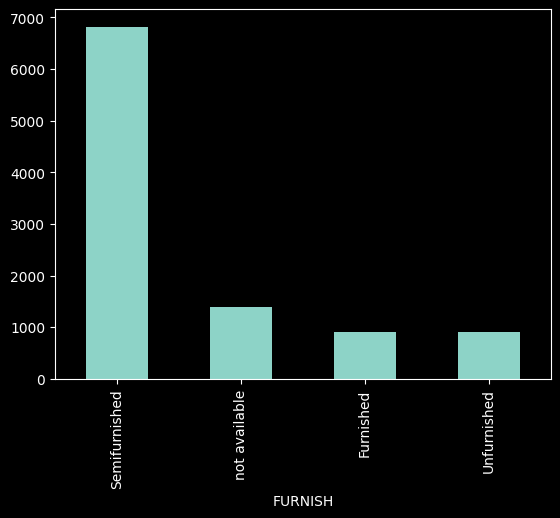

In [43]:
df["FURNISH"].value_counts().plot.bar()

- Highly imblacnced.
- Many properties have not a `FURNISH` value i.e. **not available**.

## FACING

<Axes: xlabel='FACING'>

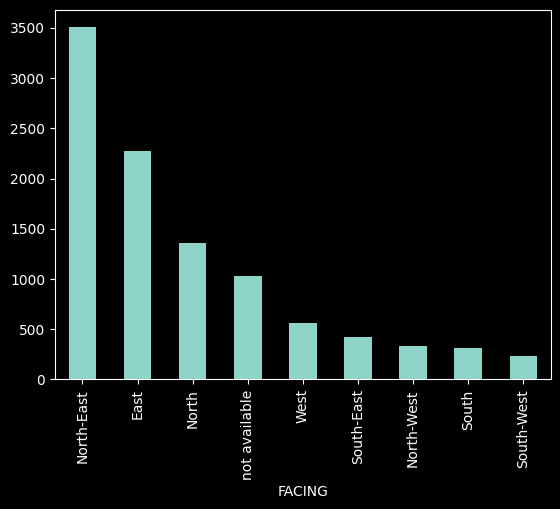

In [44]:
df["FACING"].value_counts().plot.bar()

- Imblacnced.
- Many values are missing i.e. **not available**.

## AGE

<Axes: xlabel='AGE'>

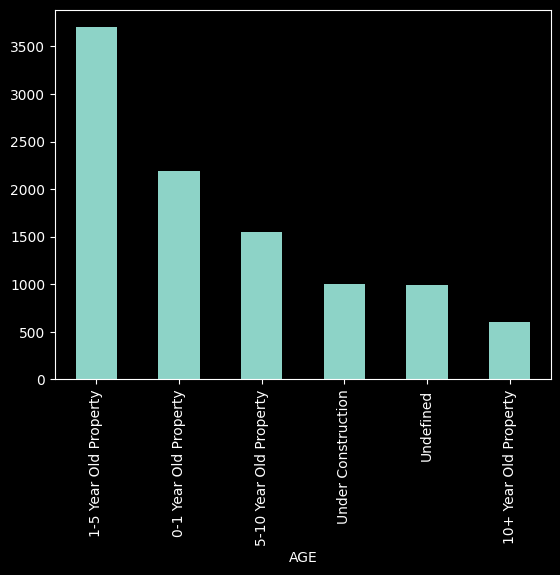

In [45]:
df["AGE"].value_counts().plot.bar()

In [46]:
df.query("AGE=='Undefined'").sample(7)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
8501,68260032,e68260032,gurgaon,39100000.0,157480.0,2286.0,10.0,residential land / plot in sector 99 gurgaon,its a 3 side 254 sq yd plot for immediate sale...,residential land,not available,North,Undefined,<15,NaN,g99,NaN,>30,28.463121,76.962544,NaN,sector 99 gurgaon,g99,g99,NaN,1.0,1.0,2.0,2.0,1.0,3.0,18,0
6458,70739386,w70739386,gurgaon,115100000.0,115100.0,9000.0,12.0,residential land / plot in sector 67 gurgaon,its 1000 sq yards plot is available on sale in...,residential land,not available,East,Undefined,<15,NaN,ansal api esencia,NaN,>30,28.432024,76.985959,NaN,sector 67 gurgaon,ansal api esencia,ansal api esencia,NaN,1.0,0.0,0.0,5.0,4.0,2.0,24,0
1185,70206674,q70206674,gurgaon,45000000.0,150000.0,2700.0,10.0,residential land / plot in sector 84 gurgaon,this plot is 300 sq yd main road facing sale f...,residential land,not available,East,Undefined,<15,NaN,NaN,NaN,>30,28.408166,76.962866,NaN,sector 84 gurgaon,NaN,NaN,block n,0.0,0.0,1.0,0.0,1.0,5.0,24,0
5418,70542334,s70542334,gurgaon,39000000.0,191176.0,1836.0,45.0,residential land / plot in sector 57 gurgaon,8 matlab plot for sale in sector 57. south eas...,residential land,not available,South-East,Undefined,<15,NaN,NaN,NaN,>30,28.423441,77.076593,NaN,sector 57 gurgaon,NaN,NaN,NaN,0.0,4.0,4.0,0.0,15.0,5.0,19,0
4626,70251286,w70251286,gurgaon,3440000.0,3675.0,936.0,18.0,residential land / plot in sector 67a gurgaon,near mumbai expressway sohna city plot sohna i...,residential land,not available,North-East,Undefined,<15,NaN,NaN,NaN,>30,28.382146,77.055471,NaN,sector 67a gurgaon,NaN,NaN,NaN,0.0,2.0,0.0,0.0,7.0,1.0,17,0
9438,70860790,u70860790,gurgaon,11300000.0,75000.0,150.0,5.0,residential land / plot in sector 95 gurgaon,brought to you by solutrean building technolog...,residential land,not available,North-West,Undefined,<15,NaN,NaN,NaN,>30,28.414324,76.908124,NaN,sector 95 gurgaon,NaN,NaN,it57,0.0,0.0,0.0,0.0,4.0,1.0,24,0
960,69882872,b69882872,gurgaon,18000000.0,120000.0,1350.0,10.0,residential land / plot in sector 82a gurgaon,vatika india next 2 is an integrated township ...,residential land,not available,East,Undefined,<15,NaN,vatika one india next,NaN,>30,28.385906,76.968939,NaN,sector 82a gurgaon,vatika one india next,vatika one india next,NaN,0.0,0.0,1.0,0.0,1.0,3.0,24,0


## TOTAL_FLOOR

<Axes: xlabel='TOTAL_FLOOR'>

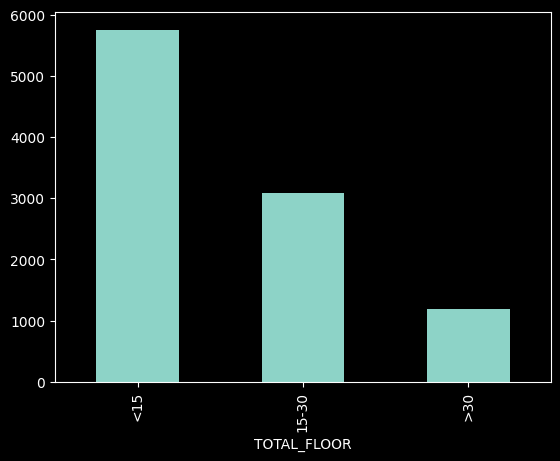

In [47]:
df["TOTAL_FLOOR"].value_counts().plot.bar()

In [48]:
summary.custom_describe(df.query("TOTAL_FLOOR=='>30'")[["PRICE", "AREA"]])

,PRICE,AREA
count,1.187000e+03,1187.000000
mean,3.180344e+07,3379.129318
std,4.240808e+07,10917.494868
min,2.800000e+04,232.000000
1%,4.500000e+04,1000.000000
5%,5.965000e+04,1300.000000
25%,2.250000e+05,1799.500000
50%,2.400000e+07,2468.000000
75%,4.450000e+07,2979.000000
95%,8.250000e+07,5092.000000


## BEDROOM_NUM

<Axes: xlabel='BEDROOM_NUM'>

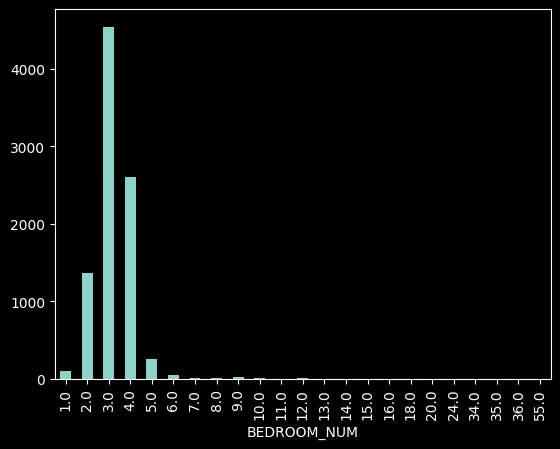

In [49]:
df["BEDROOM_NUM"].value_counts().sort_index().plot.bar()

In [50]:
gt_5bhk = df.query("BEDROOM_NUM>5")
print(gt_5bhk.shape)
summary.custom_describe(gt_5bhk[["PRICE", "AREA"]])

(164, 33)


,PRICE,AREA
count,1.640000e+02,164.000000
mean,6.428183e+07,4042.823171
std,5.896572e+07,4872.287166
min,1.250000e+05,122.000000
1%,1.657500e+05,225.710000
5%,2.957500e+05,551.850000
25%,2.995000e+07,1935.000000
50%,5.225000e+07,2700.000000
75%,8.492500e+07,4500.000000
95%,1.695500e+08,9500.000000


- Most of the property has `BEDROOM_NUM` of **2, 3 and 4**.
- Most of the property are **3BHK**.
- Only **165** properties have more than **5BHK**.

## BALCONY_NUM

<Axes: xlabel='BALCONY_NUM'>

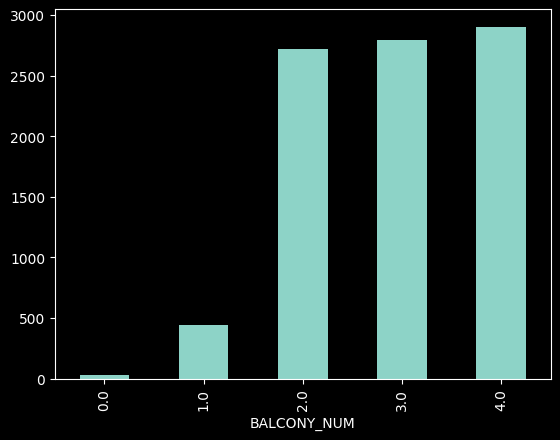

In [51]:
df["BALCONY_NUM"].value_counts().sort_index().plot.bar()

In [52]:
lte_1_balcony = df.query("BALCONY_NUM<=1")
print(lte_1_balcony.shape)
summary.custom_describe(lte_1_balcony[["PRICE", "AREA"]])

(468, 33)


,PRICE,AREA
count,4.680000e+02,468.000000
mean,7.350363e+06,2481.797009
std,1.341063e+07,24168.013284
min,7.000000e+03,126.000000
1%,8.500000e+03,324.120000
5%,1.467500e+04,469.550000
25%,3.000000e+04,650.000000
50%,8.000000e+04,1074.000000
75%,8.025000e+06,1861.750000
95%,3.412500e+07,2985.000000


## FLOOR_NUM

## BHK_BED

<Axes: xlabel='BHK_BED'>

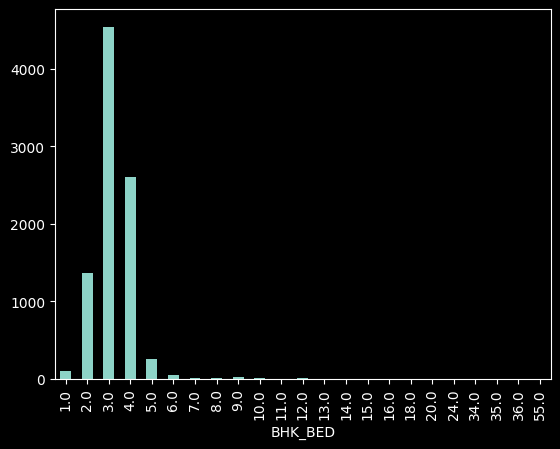

In [53]:
df["BHK_BED"].value_counts().sort_index().plot.bar()

In [54]:
summary.compare_describe(df["BEDROOM_NUM"], df["BHK_BED"])

,BEDROOM_NUM as data1,BHK_BED as data2,data1 - data2,data1 ÷ data2
count,9034.000000,9034.000000,0.0,1.0
mean,3.300199,3.300199,0.0,1.0
std,1.514894,1.514894,0.0,1.0
min,1.000000,1.000000,0.0,1.0
1%,1.000000,1.000000,0.0,1.0
5%,2.000000,2.000000,0.0,1.0
25%,3.000000,3.000000,0.0,1.0
50%,3.000000,3.000000,0.0,1.0
75%,4.000000,4.000000,0.0,1.0
95%,4.000000,4.000000,0.0,1.0


Hence, both `BALCONY_NUM` and `BHK_BED` columns are same. So, I need to drop `BHK_BED` column.

## LOCALITY_NAME

In [55]:
df["LOCALITY_NAME"].nunique()

265

In [56]:
df["LOCALITY_NAME"].value_counts()[:15]

LOCALITY_NAME
sector 102 gurgaon    374
dlf phase 2           266
sector 65 gurgaon     258
sector 57 gurgaon     235
sector 48 gurgaon     231
dlf phase 1           222
sector 62 gurgaon     213
sector 54 gurgaon     210
sector 83 gurgaon     196
sector 67a gurgaon    196
sector 67 gurgaon     191
sector 85 gurgaon     176
sector 108 gurgaon    175
sector 66 gurgaon     174
dlf phase 5           165
Name: count, dtype: int64

## BUILDING_NAME

In [57]:
df["BUILDING_NAME"].sample(10, random_state=2)

8411                              paras dews
3695                      vipul tatvam villa
1818    shapoorji pallonji joyville gurugram
9713                  emaar the palm springs
4234                  pioneer urban presidia
254                        top rated builder
6713                                     NaN
8719                        puri emerald bay
9566                   vatika sovereign next
3411                            dlf the icon
Name: BUILDING_NAME, dtype: object

## SOCIETY_NAME

In [58]:
df["SOCIETY_NAME"].sample(10, random_state=2)

8411                              paras dews
3695                      vipul tatvam villa
1818    shapoorji pallonji joyville gurugram
9713                  emaar the palm springs
4234                  pioneer urban presidia
254                        top rated builder
6713                                     NaN
8719                        puri emerald bay
9566                   vatika sovereign next
3411                            dlf the icon
Name: SOCIETY_NAME, dtype: object

## BUILDING_NAME, SOCIETY_NAME

In [59]:
df[["BUILDING_NAME", "SOCIETY_NAME"]].sample(10)

,BUILDING_NAME,SOCIETY_NAME
3809,pyramid urban,pyramid urban
5135,dlf city plots phase 2,dlf city plots phase 2
148,signature global city 81,signature global city 81
1768,vatika independent floors,vatika independent floors
4330,tulip leaf,tulip leaf
9320,vatika lifestyle homes,vatika lifestyle homes
6871,dlf carlton estate,dlf carlton estate
757,brand nnew builder dlf city 2,brand nnew builder dlf city 2
242,NaN,NaN
3792,NaN,NaN


In [60]:
df["SOCIETY_NAME"].ne(df["BUILDING_NAME"]).sum()

1804

## ADDRESS

In [61]:
df["ADDRESS"].sample(10)

8767                        NaN
6409                        NaN
6168                        NaN
3783                        NaN
314                        0000
3478                        NaN
7293    near huda meteo station
4052                        NaN
1271                      51-03
143                         NaN
Name: ADDRESS, dtype: object

## LANDMARKS

#### TRANSPORATION, ACCOMODATION, LEISURE, EDUCATION, HEALTH, OTHER

In [62]:
landmarks = ["TRANSPORATION", "ACCOMODATION", "LEISURE", "EDUCATION", "HEALTH", "OTHER"]
df[["TOTAL_LANDMARK_COUNT", *landmarks]].sample(10)

,TOTAL_LANDMARK_COUNT,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER
7847,47.0,0.0,10.0,2.0,0.0,17.0,2.0
9969,15.0,3.0,0.0,0.0,0.0,0.0,12.0
9472,13.0,2.0,3.0,4.0,2.0,1.0,1.0
7455,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5643,45.0,0.0,4.0,2.0,0.0,21.0,2.0
4928,6.0,1.0,1.0,1.0,0.0,1.0,2.0
1116,13.0,2.0,2.0,2.0,2.0,1.0,4.0
9749,44.0,0.0,3.0,1.0,0.0,21.0,2.0
3279,45.0,6.0,8.0,0.0,0.0,19.0,1.0
5006,47.0,1.0,11.0,0.0,2.0,14.0,3.0


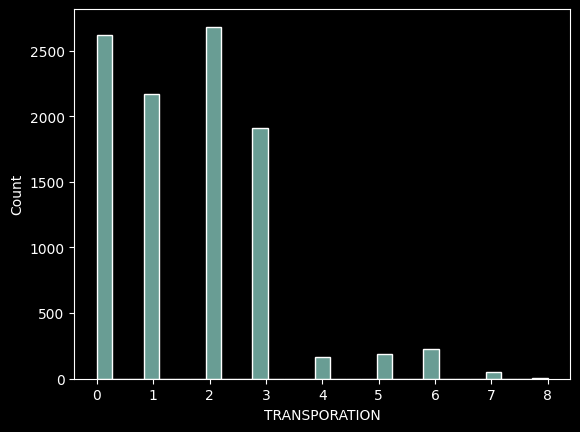

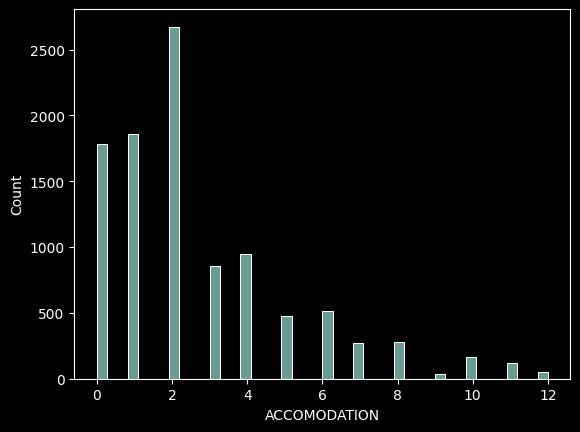

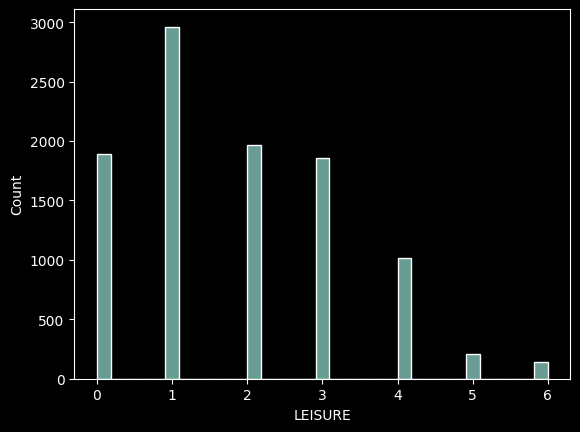

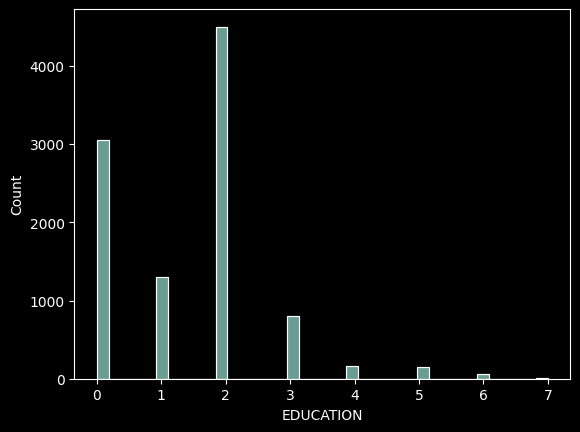

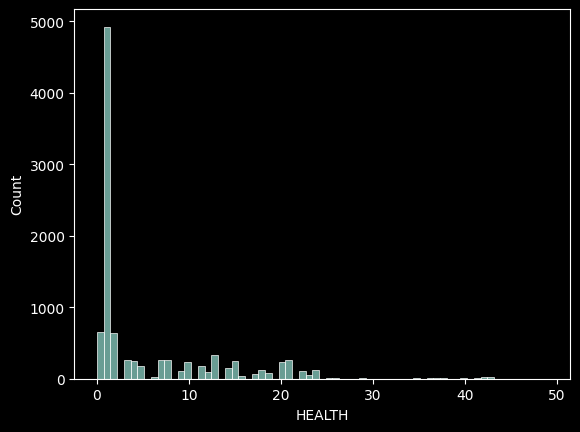

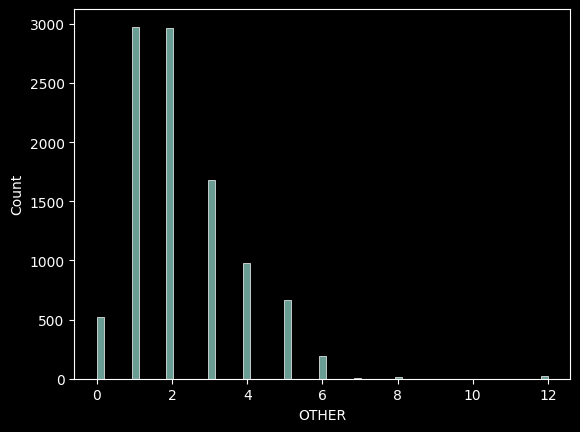

In [63]:
for col in landmarks:
    plt.figure()
    sns.histplot(df[col])

### KMeans on LANDMARKS

In [64]:
landmarks_df = df[landmarks]

In [65]:
scaler = StandardScaler()
landmarks_scaled = scaler.fit_transform(landmarks_df)

In [66]:
cluster_range = range(1, 11)
wcss_reduced = []

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(landmarks_scaled)
    wcss_reduced.append(kmeans.inertia_)

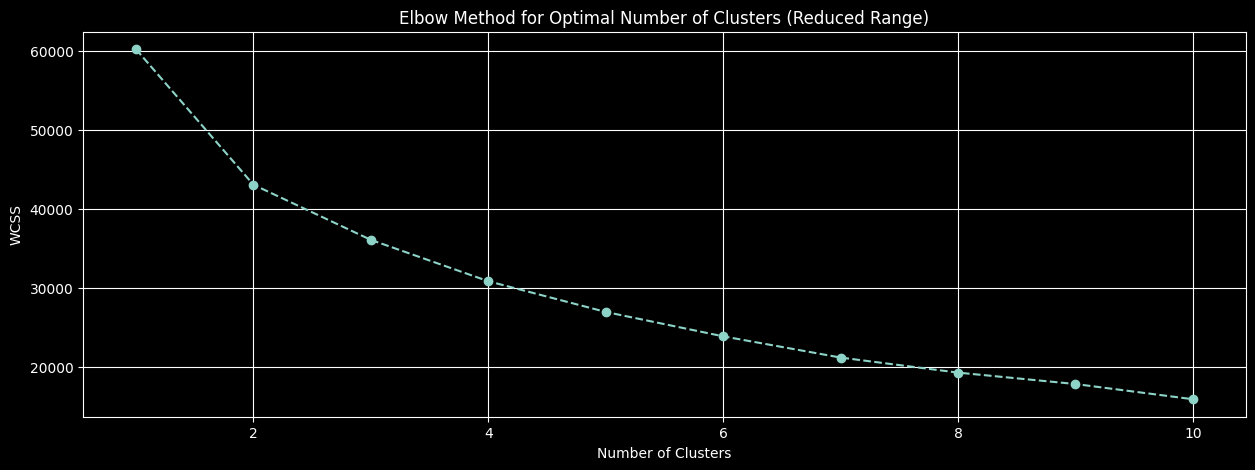

In [67]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(cluster_range, wcss_reduced, marker="o", linestyle="--")

plt.title("Elbow Method for Optimal Number of Clusters (Reduced Range)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [68]:
best_n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, init="k-means++", n_init=10, random_state=42)
kmeans.fit(landmarks_df)

# Predict the cluster assignments for each row
df["LANDMARKS_CLUSTER"] = kmeans.predict(landmarks_df)
df["LANDMARKS_CLUSTER"].value_counts()

LANDMARKS_CLUSTER
0    6959
2    1907
1    1166
Name: count, dtype: int64

## AMENITIES_SCORE, FEATURES_SCORE

In [69]:
scores = ["AMENITIES_SCORE", "FEATURES_SCORE"]
df[["TOTAL_LANDMARK_COUNT"] + landmarks + scores].sample(10)

,TOTAL_LANDMARK_COUNT,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
7811,45.0,0.0,3.0,2.0,0.0,20.0,1.0,47,18
4023,15.0,2.0,2.0,3.0,2.0,1.0,5.0,98,53
5314,15.0,3.0,3.0,4.0,2.0,1.0,2.0,55,15
2450,46.0,0.0,4.0,1.0,0.0,21.0,2.0,53,18
2481,4.0,0.0,3.0,0.0,0.0,0.0,0.0,18,0
2342,47.0,3.0,3.0,0.0,2.0,13.0,2.0,82,36
220,13.0,3.0,2.0,4.0,1.0,2.0,1.0,0,0
3962,44.0,0.0,3.0,3.0,0.0,17.0,2.0,55,35
821,44.0,6.0,7.0,0.0,0.0,19.0,1.0,6,0
5792,46.0,2.0,6.0,0.0,2.0,11.0,3.0,124,61


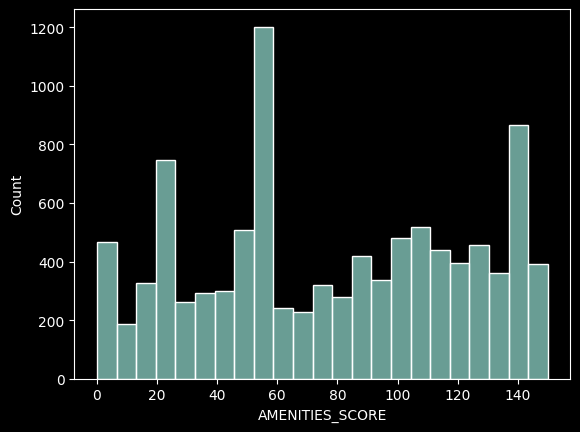

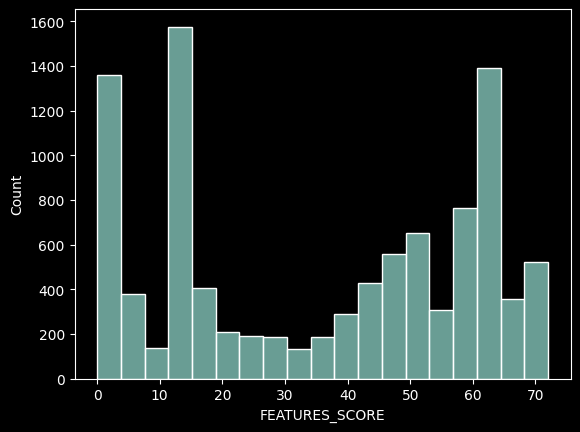

In [70]:
for col in scores:
    plt.figure()
    sns.histplot(df[col])

### KMeans on LANDMARKS

In [71]:
temp_df = df[landmarks + scores]
temp_df.isnull().sum()

TRANSPORATION      0
ACCOMODATION       0
LEISURE            0
EDUCATION          0
HEALTH             0
OTHER              0
AMENITIES_SCORE    0
FEATURES_SCORE     0
dtype: int64

In [72]:
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(temp_df)

In [73]:
cluster_range = range(1, 11)
wcss_reduced = []

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(temp_scaled)
    wcss_reduced.append(kmeans.inertia_)

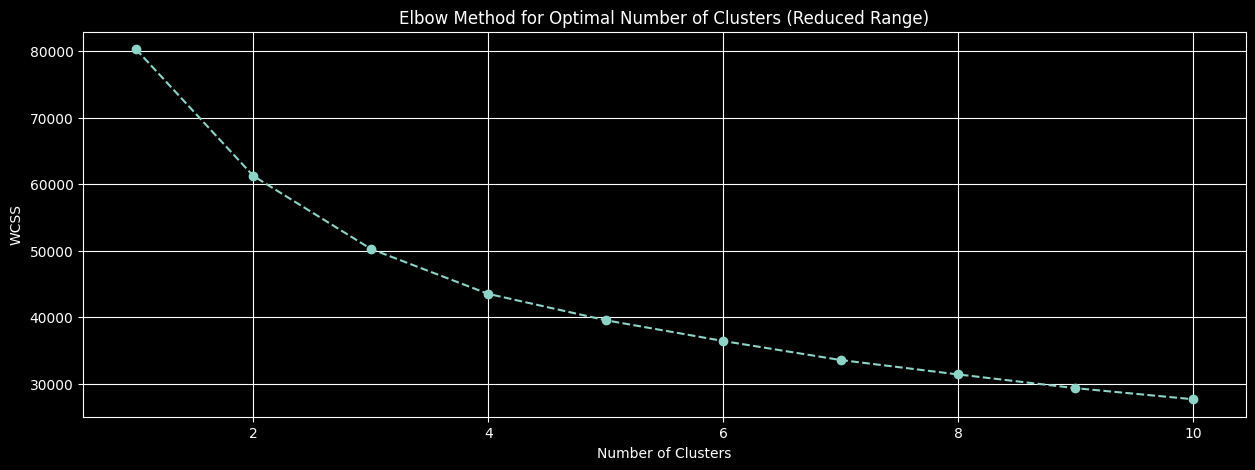

In [74]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(cluster_range, wcss_reduced, marker="o", linestyle="--")

plt.title("Elbow Method for Optimal Number of Clusters (Reduced Range)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [75]:
best_n_clusters = 4

# Fit the KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, init="k-means++", n_init=10, random_state=42)
kmeans.fit(temp_df)

# Predict the cluster assignments for each row
df["LANDMARKS_N_SCORES_CLUSTER"] = kmeans.predict(temp_df)
df["LANDMARKS_N_SCORES_CLUSTER"].value_counts()

LANDMARKS_N_SCORES_CLUSTER
2    2757
0    2665
3    2577
1    2033
Name: count, dtype: int64

## LANDMARKS_CLUSTER, LANDMARKS_W_SCORES_CLUSTER

In [76]:
clusters = ["LANDMARKS_CLUSTER", "LANDMARKS_N_SCORES_CLUSTER"]
df[clusters].value_counts()

LANDMARKS_CLUSTER  LANDMARKS_N_SCORES_CLUSTER
0                  0                             2265
                   3                             2001
                   2                             1576
                   1                             1117
2                  2                              733
                   1                              567
1                  2                              448
                   1                              349
2                  3                              349
                   0                              258
1                  3                              227
                   0                              142
Name: count, dtype: int64

## General Steps - End

### There is **no exporting** of `DataFrame`(s) in EDA notebooks.

In [77]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE', 'LANDMARKS_CLUSTER',
       'LANDMARKS_N_SCORES_CLUSTER'],
      dtype='object')

In [78]:
drop_cols = [
    "SPID",
    "BHK_BED",
    "BUILDING_NAME",
    "SOCIETY_NAME",
    "ADDRESS",
    "TRANSPORATION",
    "ACCOMODATION",
    "LEISURE",
    "EDUCATION",
    "HEALTH",
    "OTHER",
    "AMENITIES_SCORE",
    "FEATURES_SCORE",
]
print(f"After analysis columns to drop: {drop_cols}")

After analysis columns to drop: ['SPID', 'BHK_BED', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS', 'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH', 'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE']


In [79]:
df.sample(8)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
2758,70191426,h70191426,gurgaon,30000000.0,13636.0,2200.0,45.0,4 bhk independent builder floor in south city 2,location: gurgaon sec. 49 south city 2 near: p...,independent/builder floor,not available,North,0-1 Year Old Property,<15,4.0,NaN,4.0,<15,28.418353,77.053084,4.0,south city 2,NaN,NaN,001,0.0,4.0,3.0,0.0,18.0,2.0,57,20,1,2
1648,70722302,l70722302,gurgaon,250000.0,55.0,4500.0,44.0,4 bhk independent builder floor in dlf phase 2,brand new builderfloor in dlf phase 2 gurgaon ...,independent/builder floor,Unfurnished,South,0-1 Year Old Property,<15,4.0,NaN,2.0,<15,28.488963,77.086665,4.0,dlf phase 2,NaN,NaN,NaN,5.0,8.0,0.0,0.0,13.0,3.0,30,5,2,1
8109,50446040,o50446040,gurgaon,3500000.0,2916.0,1200.0,48.0,2 bhk independent builder floor in shanti nagar,why pay rent get ready to move 2 bhk front s...,independent/builder floor,Furnished,East,0-1 Year Old Property,<15,2.0,NaN,1.0,<15,28.444527,77.022730,2.0,shanti nagar,NaN,NaN,tanishq residency,0.0,0.0,2.0,0.0,41.0,3.0,39,8,1,2
278,69913556,p69913556,gurgaon,35000.0,1.0,34000.0,49.0,3 bedroom house in sector 10a gurgaon,rent this 3 bhk house in gurgaon's most sought...,independent house/villa,Semifurnished,East,0-1 Year Old Property,<15,3.0,NaN,3.0,>30,28.445676,77.007452,3.0,sector 10a gurgaon,NaN,NaN,NaN,0.0,0.0,2.0,0.0,42.0,4.0,35,7,1,1
3812,70926226,r70926226,gurgaon,6500000.0,5416.0,1200.0,11.0,2 bhk flat in sector 67a gurgaon,new property prime location on road near by a...,residential apartment,Furnished,East,1-5 Year Old Property,<15,2.0,pyramid urban,1.0,<15,28.378112,77.056045,2.0,sector 67a gurgaon,pyramid urban,pyramid urban,NaN,0.0,1.0,3.0,6.0,0.0,1.0,52,24,0,2
2550,70434558,a70434558,gurgaon,58000.0,184.0,2835.0,44.0,3 bhk independent builder floor in dlf phase 2,carefully laid out in the prime location of gu...,independent/builder floor,Semifurnished,East,1-5 Year Old Property,<15,3.0,NaN,2.0,g,28.488963,77.086665,3.0,dlf phase 2,NaN,NaN,NaN,5.0,8.0,0.0,0.0,13.0,3.0,53,18,2,2
2428,70124728,z70124728,gurgaon,45000.0,18.0,2408.0,13.0,3 bhk flat in sector 85 gurgaon,this is 3bhk semi furnished flat in sec 85 gur...,residential apartment,Semifurnished,North,1-5 Year Old Property,15-30,3.0,ss the leaf,3.0,<15,28.409748,76.953903,3.0,sector 85 gurgaon,ss the leaf,ss the leaf,NaN,1.0,2.0,3.0,2.0,1.0,4.0,118,61,0,0
4271,70282608,b70282608,gurgaon,39000000.0,18813.0,2073.0,12.0,3 bhk flat in sector 108 gurgaon,this 3 bhk apartment is available for sale in ...,residential apartment,Unfurnished,North,Under Construction,15-30,3.0,sobha city,3.0,<15,28.516331,76.995685,3.0,sector 108 gurgaon,sobha city,sobha city,tower z,3.0,2.0,3.0,2.0,1.0,1.0,97,43,0,3
